In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

In [2]:
#country data
url = "https://github.com//cs109//2014_data//raw//master//countries.csv"
countries = pd.read_csv(url)
print(countries.shape)

(194, 2)


In [3]:
url = 'https://raw.githubusercontent.com/ibrahimr/Sharing/main/ny_gnp_mktp_pp_cd.csv'
income = pd.read_csv(url , error_bad_lines=False)
income.shape

(186, 31)

In [4]:
countries.head()

Country  Region
0   Algeria  AFRICA
1    Angola  AFRICA
2     Benin  AFRICA
3  Botswana  AFRICA
4   Burkina  AFRICA

In [5]:
countries.groupby("Region").count()
 

Country
Region                
AFRICA              54
ASIA                44
EUROPE              47
NORTH AMERICA       23
OCEANIA             14
SOUTH AMERICA       12

Text(0.5, 1.0, 'Number of Countries in each region')

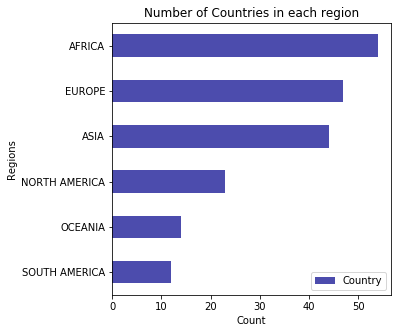

In [6]:
#np.sort( countries.groupby("Region").count().plot()
countries.groupby("Region").count().sort_values("Country").plot(kind='barh', alpha=.7 , figsize=(5,5), color ='darkblue');
plt.xlabel('Count')
plt.ylabel('Regions')
plt.title("Number of Countries in each region")

In [7]:
income.head()


country          1990          1991          1992  \
0          Afghanistan           NaN           NaN           NaN   
1              Albania  8.370000e+09  6.130000e+09  5.660000e+09   
2              Algeria  1.720000e+11  1.720000e+11  1.810000e+11   
3               Angola  3.530000e+10  4.040000e+10  2.050000e+10   
4  Antigua and Barbuda  6.550000e+08  7.160000e+08  7.470000e+08   

           1993          1994          1995          1996          1997  \
0           NaN           NaN           NaN           NaN           NaN   
1  6.800000e+09  7.390000e+09  8.620000e+09  9.650000e+09  8.740000e+09   
2  1.830000e+11  1.840000e+11  1.930000e+11  2.040000e+11  2.120000e+11   
3  1.940000e+10  1.700000e+10  3.260000e+10  3.470000e+10  4.190000e+10   
4  8.180000e+08  8.900000e+08  8.670000e+08  9.470000e+08  1.020000e+09   

           1998  ...          2010          2011          2012          2013  \
0           NaN  ...  5.000000e+10  5.110000e+10  5.980000e+10  6.530000e+10   
1  9.740000e+09  ...  2.780000e+10  2.970000e+10  3.030000e+10  3.110000e+10   
2  2.260000e+11  ...  4.700000e+11  4.900000e+11  4.880000e+11  4.870000e+11   
3  4.320000e+10  ...  1.390000e+11  1.480000e+11  1.710000e+11  1.850000e+11   
4  1.090000e+09  ...  1.770000e+09  1.760000e+09  1.710000e+09  1.660000e+09   

           2014          2015          2016          2017          2018  \
0  6.910000e+10  7.250000e+10  7.600000e+10  8.090000e+10  8.420000e+10   
1  3.280000e+10  3.400000e+10  3.510000e+10  3.760000e+10  3.960000e+10   
2  4.950000e+11  4.650000e+11  4.670000e+11  4.710000e+11  4.840000e+11   
3  2.070000e+11  1.940000e+11  1.940000e+11  2.050000e+11  2.020000e+11   
4  1.670000e+09  1.670000e+09  1.740000e+09  1.810000e+09  1.970000e+09   

           2019  
0  8.860000e+10  
1  4.090000e+10  
2  4.960000e+11  
3  2.030000e+11  
4  2.090000e+09  

[5 rows x 31 columns]

In [8]:
income.iloc[:,1:]=income.iloc[:,1:]/1000000
income.tail()

country      1990      1991      1992      1993      1994      1995  \
181  Venezuela  185000.0  211000.0  225000.0  231000.0  230000.0  246000.0   
182    Vietnam   58400.0   64700.0   73400.0   80800.0   91000.0  103000.0   
183      Yemen   24100.0   25700.0   28800.0   30800.0   33500.0   35300.0   
184     Zambia   10800.0   10900.0   11100.0   12400.0   11800.0   12400.0   
185   Zimbabwe   18100.0   19700.0   18300.0   19000.0   21100.0   21500.0   

         1996      1997      1998  ...      2010      2011      2012  \
181  250000.0  269000.0  273000.0  ...  470000.0  494000.0       NaN   
182  114000.0  126000.0  134000.0  ...  357000.0  385000.0  435000.0   
183   35900.0   38300.0   42500.0  ...   90700.0   79700.0   81700.0   
184   13500.0   14200.0   14200.0  ...   40300.0   44300.0   48700.0   
185   24300.0   25200.0   26000.0  ...   20500.0   23300.0   27100.0   

         2013      2014      2015      2016      2017      2018      2019  
181       NaN       NaN       NaN       NaN       NaN       NaN       NaN  
182  465000.0  502000.0  537000.0  590000.0  626000.0  690000.0  747000.0  
183   88600.0       NaN       NaN       NaN       NaN       NaN       NaN  
184   51200.0   53400.0   53400.0   54000.0   56100.0   61600.0   63900.0  
185   30800.0   32100.0   33300.0   36000.0   39300.0   43200.0   40000.0  

[5 rows x 31 columns]

###  income per person across all countries, visualization


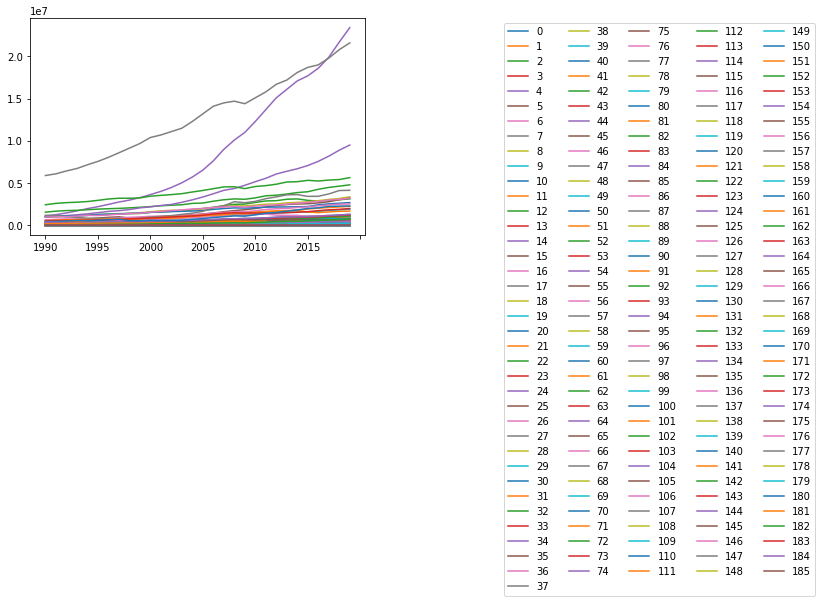

In [9]:
df=income.iloc[:,1:]
df.T.plot()
plt.legend( loc = 'upper left' ,bbox_to_anchor=(1.4, 1), ncol=5) 

Text(0.5, 1.0, 'income over year for all countres')

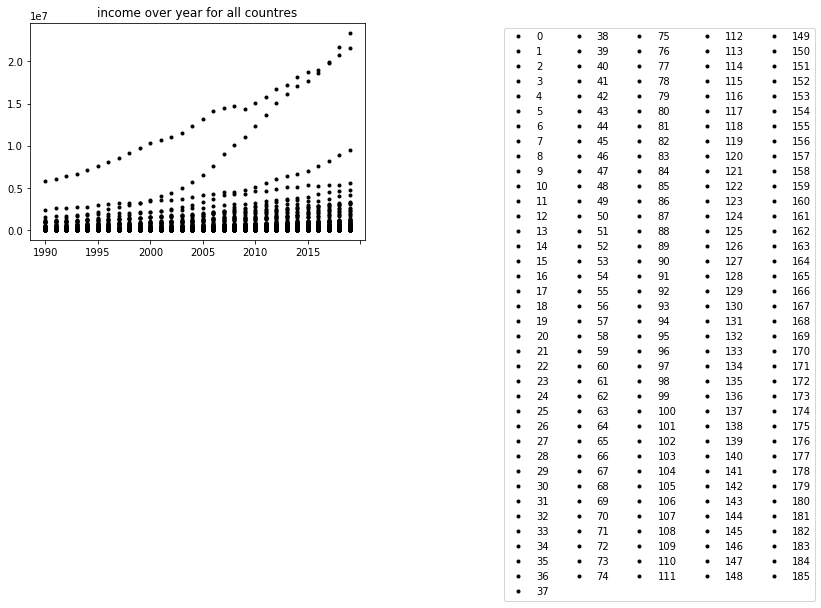

In [10]:
df.T.plot(style='k.')
plt.legend( loc = 'upper left' ,bbox_to_anchor=(1.4, 1), ncol=5) 
plt.title("income over year for all countres")



plt.figure(figsize=(20,4))

sns.stripplot(data=sal_by_team_by_year2, x='W', y='salary'  , hue='teamID'  ,  size=5);
plt.xlabel("Relationship between total wins and total salaries ")
plt.ylabel("  salaries ")
plt.xticks(rotation=90)
plt.title("Wins")

<Figure size 1440x288 with 0 Axes>

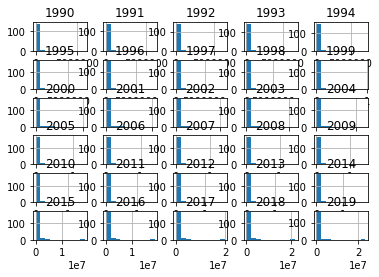

In [11]:
plt.figure(figsize=(20,4))

df.hist();


In [12]:
income.iloc[2, :]

country    Algeria
1990        172000
1991        172000
1992        181000
1993        183000
1994        184000
1995        193000
1996        204000
1997        212000
1998        226000
1999        235000
2000        249000
2001        268000
2002        285000
2003        312000
2004        332000
2005        359000
2006        380000
2007        414000
2008        436000
2009        445000
2010        470000
2011        490000
2012        488000
2013        487000
2014        495000
2015        465000
2016        467000
2017        471000
2018        484000
2019        496000
Name: 2, dtype: object

In [13]:
df2=income.unstack()
df2.head()

country  0            Afghanistan
         1                Albania
         2                Algeria
         3                 Angola
         4    Antigua and Barbuda
dtype: object

income.unstack() 

In [14]:
income.index

RangeIndex(start=0, stop=186, step=1)

In [15]:
income.reset_index()

index              country      1990      1991      1992      1993  \
0        0          Afghanistan       NaN       NaN       NaN       NaN   
1        1              Albania    8370.0    6130.0    5660.0    6800.0   
2        2              Algeria  172000.0  172000.0  181000.0  183000.0   
3        3               Angola   35300.0   40400.0   20500.0   19400.0   
4        4  Antigua and Barbuda     655.0     716.0     747.0     818.0   
..     ...                  ...       ...       ...       ...       ...   
181    181            Venezuela  185000.0  211000.0  225000.0  231000.0   
182    182              Vietnam   58400.0   64700.0   73400.0   80800.0   
183    183                Yemen   24100.0   25700.0   28800.0   30800.0   
184    184               Zambia   10800.0   10900.0   11100.0   12400.0   
185    185             Zimbabwe   18100.0   19700.0   18300.0   19000.0   

         1994      1995      1996      1997  ...      2010      2011  \
0         NaN       NaN       NaN       NaN  ...   50000.0   51100.0   
1      7390.0    8620.0    9650.0    8740.0  ...   27800.0   29700.0   
2    184000.0  193000.0  204000.0  212000.0  ...  470000.0  490000.0   
3     17000.0   32600.0   34700.0   41900.0  ...  139000.0  148000.0   
4       890.0     867.0     947.0    1020.0  ...    1770.0    1760.0   
..        ...       ...       ...       ...  ...       ...       ...   
181  230000.0  246000.0  250000.0  269000.0  ...  470000.0  494000.0   
182   91000.0  103000.0  114000.0  126000.0  ...  357000.0  385000.0   
183   33500.0   35300.0   35900.0   38300.0  ...   90700.0   79700.0   
184   11800.0   12400.0   13500.0   14200.0  ...   40300.0   44300.0   
185   21100.0   21500.0   24300.0   25200.0  ...   20500.0   23300.0   

         2012      2013      2014      2015      2016      2017      2018  \
0     59800.0   65300.0   69100.0   72500.0   76000.0   80900.0   84200.0   
1     30300.0   31100.0   32800.0   34000.0   35100.0   37600.0   39600.0   
2    488000.0  487000.0  495000.0  465000.0  467000.0  471000.0  484000.0   
3    171000.0  185000.0  207000.0  194000.0  194000.0  205000.0  202000.0   
4      1710.0    1660.0    1670.0    1670.0    1740.0    1810.0    1970.0   
..        ...       ...       ...       ...       ...       ...       ...   
181       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
182  435000.0  465000.0  502000.0  537000.0  590000.0  626000.0  690000.0   
183   81700.0   88600.0       NaN       NaN       NaN       NaN       NaN   
184   48700.0   51200.0   53400.0   53400.0   54000.0   56100.0   61600.0   
185   27100.0   30800.0   32100.0   33300.0   36000.0   39300.0   43200.0   

         2019  
0     88600.0  
1     40900.0  
2    496000.0  
3    203000.0  
4      2090.0  
..        ...  
181       NaN  
182  747000.0  
183       NaN  
184   63900.0  
185   40000.0  

[186 rows x 32 columns]

df=income.set_index('country')
df

year=['1990','1991','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019']

dfy=income.set_index(year  )

In [16]:
subset = income.iloc[[1], : ]
myx=income.iloc[[1],0 ]
myy=income.iloc[[1],1: ]
#In [38]: sns.barplot(y=subset.index, x=subset.values)
subset 
print(subset.values)
income.iloc[[1], : ]

[['Albania' 8370.0 6130.0 5660.0 6800.0 7390.0 8620.0 9650.0 8740.0
  9740.0 11000.0 12300.0 13700.0 14600.0 15600.0 16800.0 18000.0 20200.0
  22200.0 24400.0 25400.0 27800.0 29700.0 30300.0 31100.0 32800.0 34000.0
  35100.0 37600.0 39600.0 40900.0]]


country    1990    1991    1992    1993    1994    1995    1996    1997  \
1  Albania  8370.0  6130.0  5660.0  6800.0  7390.0  8620.0  9650.0  8740.0   

     1998  ...     2010     2011     2012     2013     2014     2015     2016  \
1  9740.0  ...  27800.0  29700.0  30300.0  31100.0  32800.0  34000.0  35100.0   

      2017     2018     2019  
1  37600.0  39600.0  40900.0  

[1 rows x 31 columns]

In [17]:
income.set_index('country',inplace=True)

C:\Users\hp\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\hp\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\hp\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`

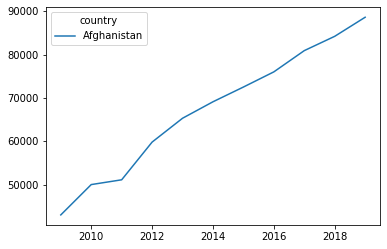

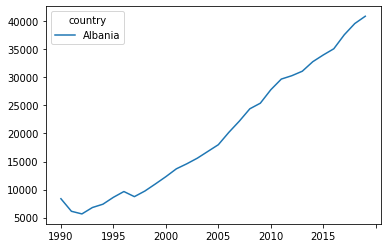

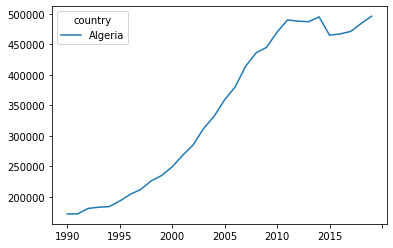

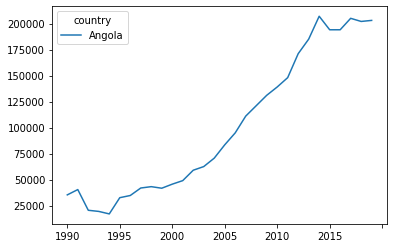

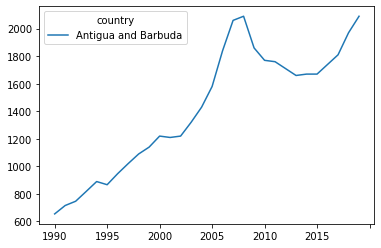

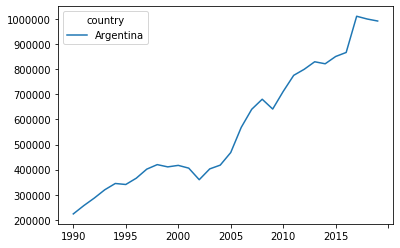

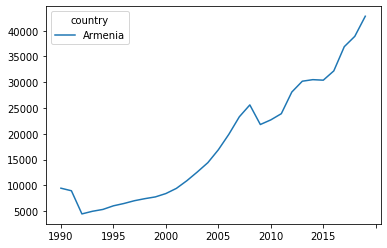

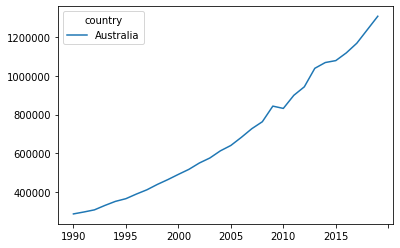

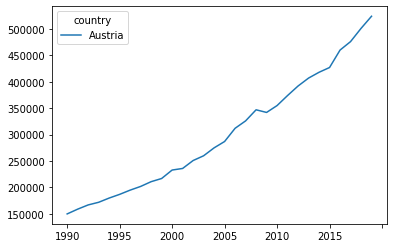

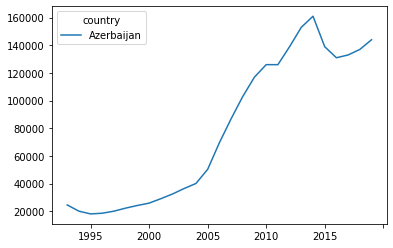

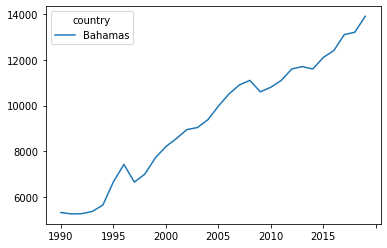

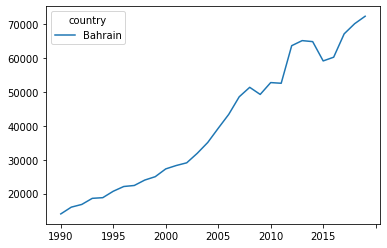

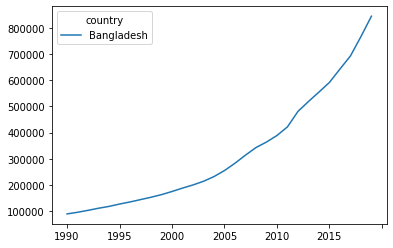

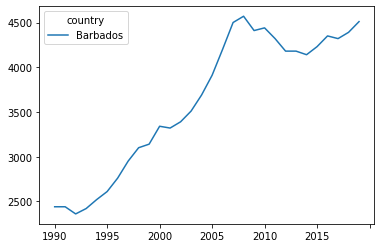

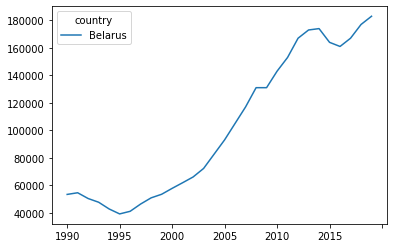

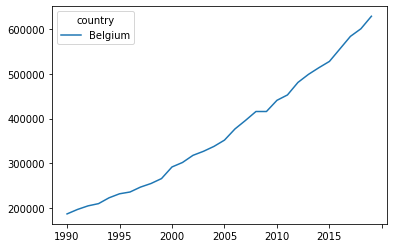

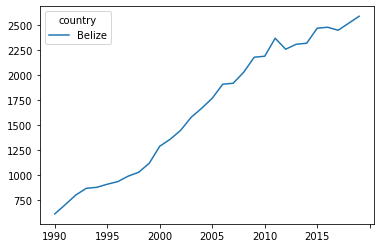

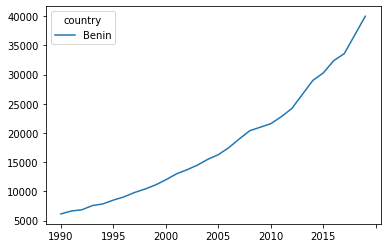

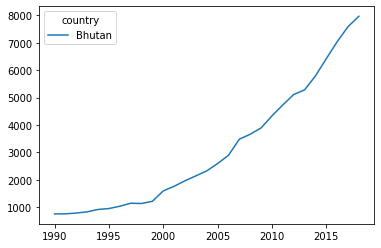

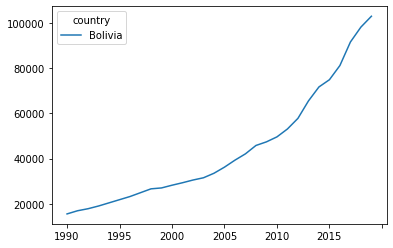

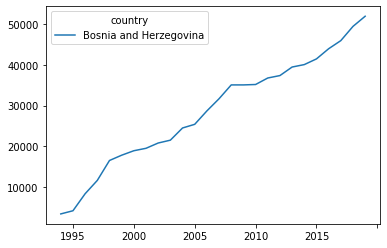

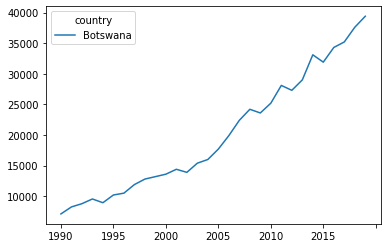

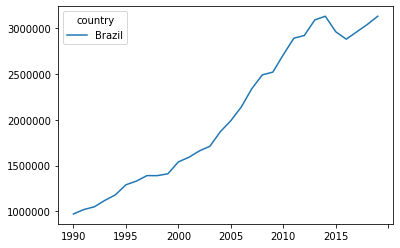

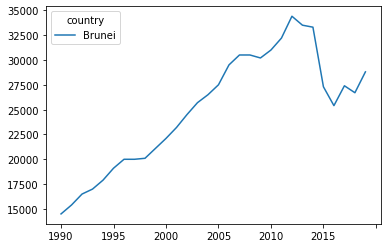

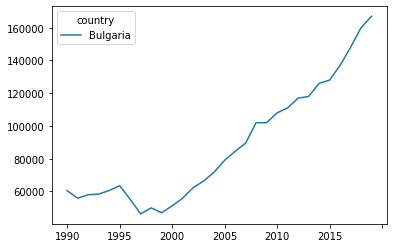

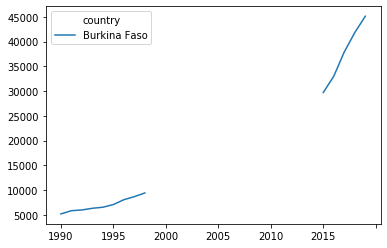

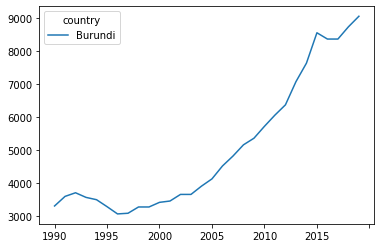

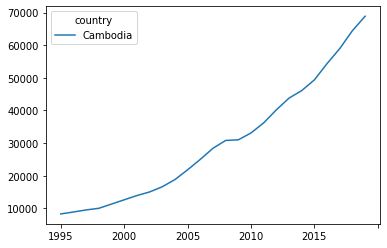

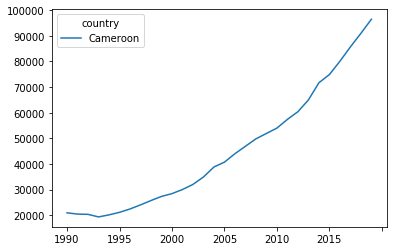

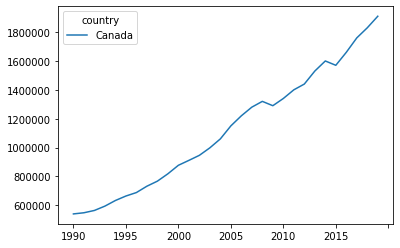

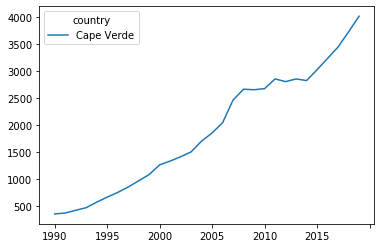

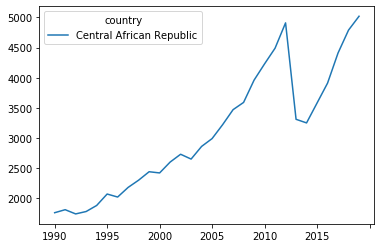

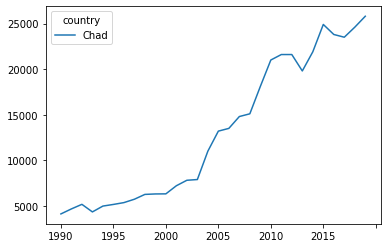

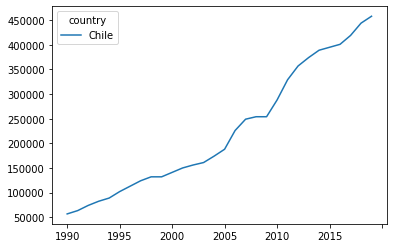

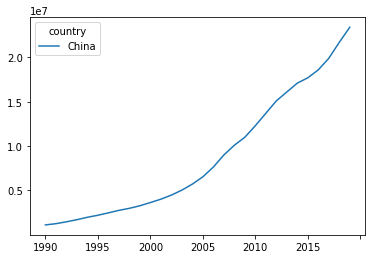

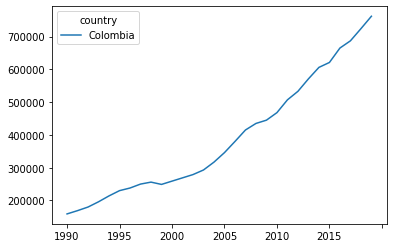

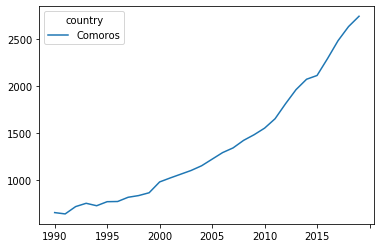

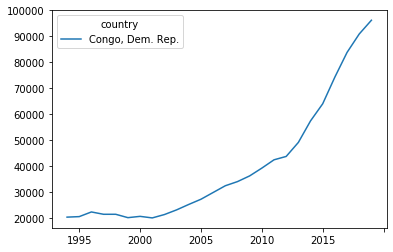

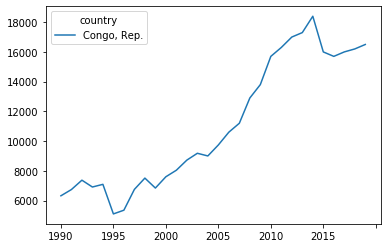

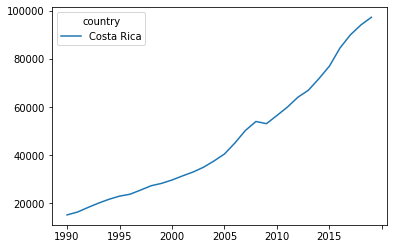

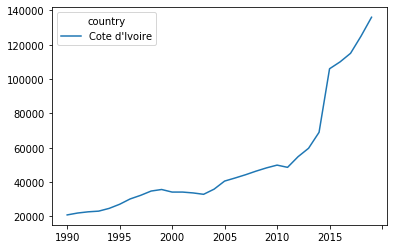

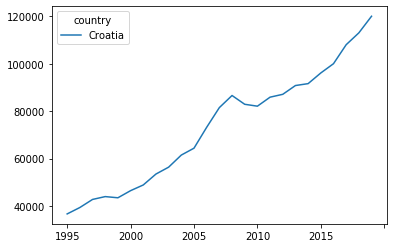

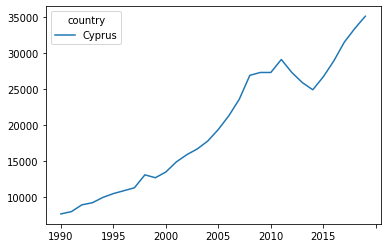

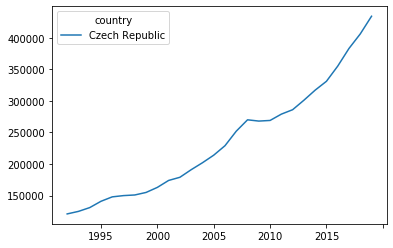

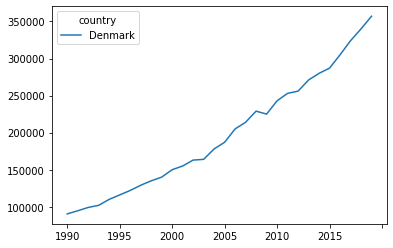

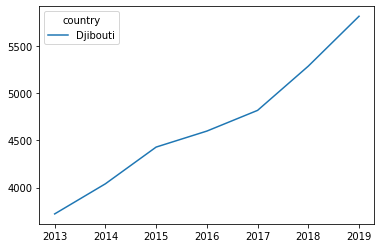

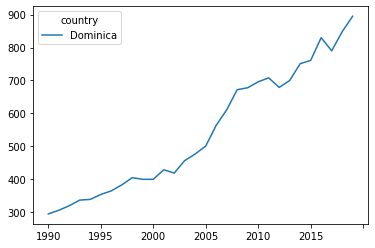

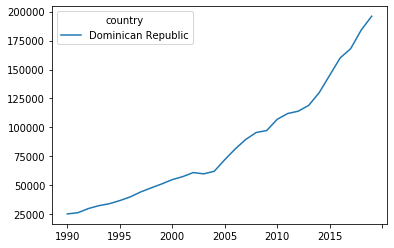

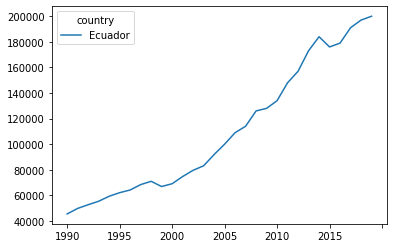

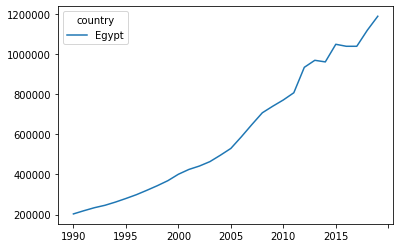

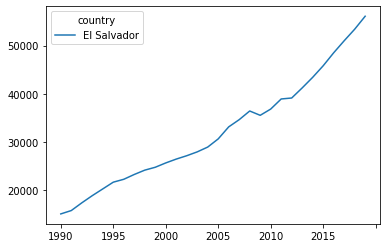

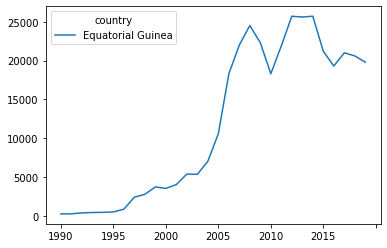

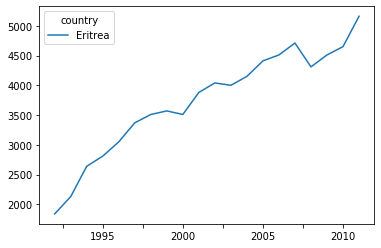

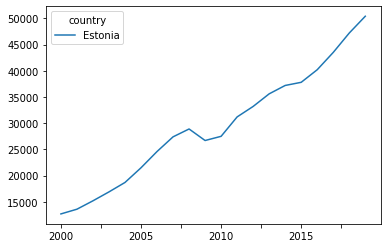

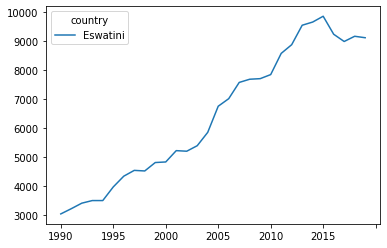

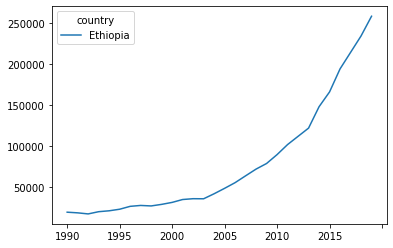

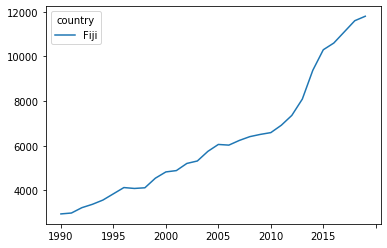

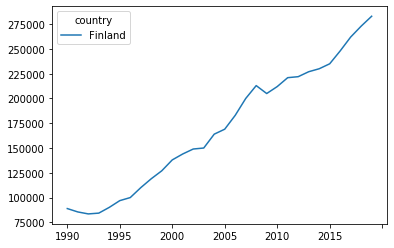

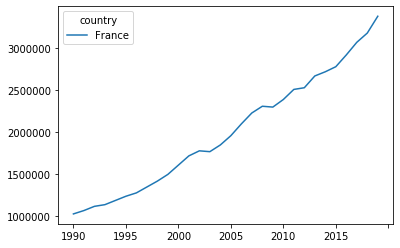

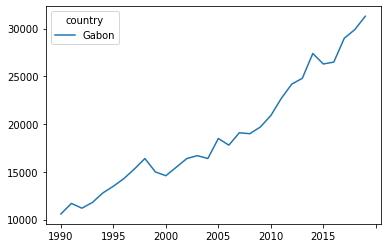

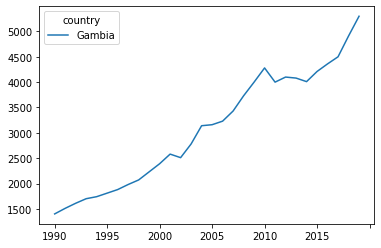

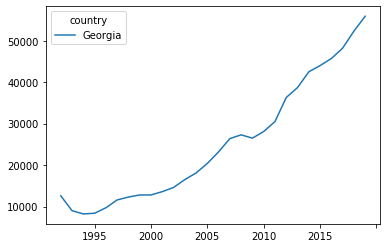

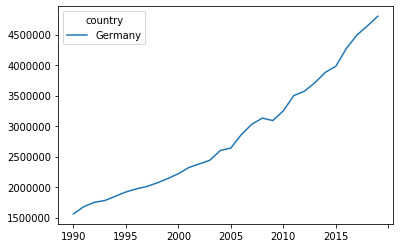

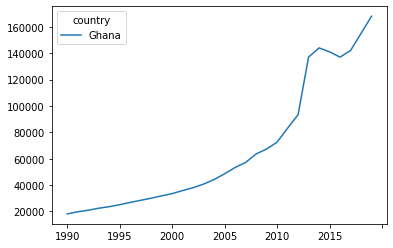

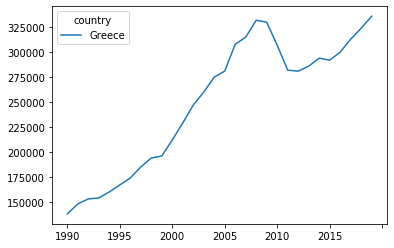

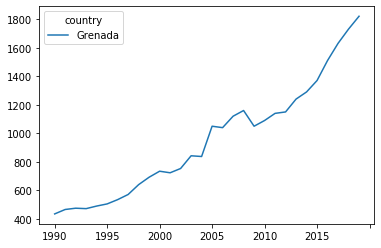

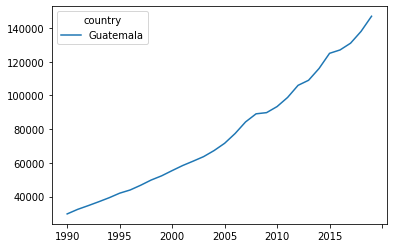

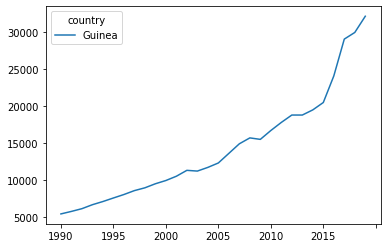

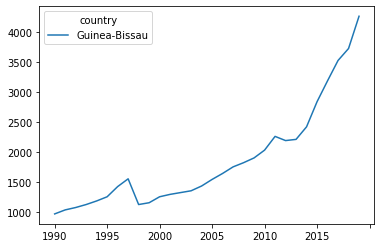

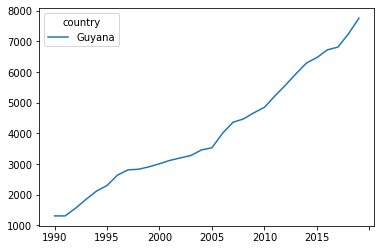

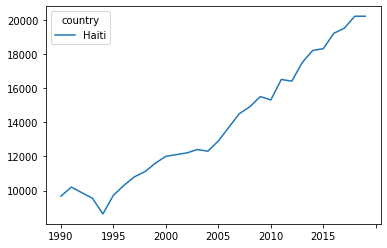

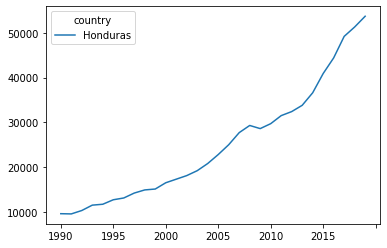

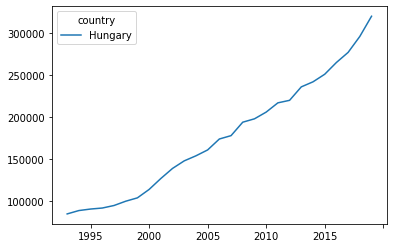

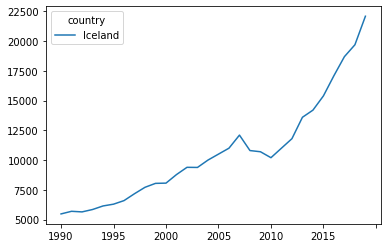

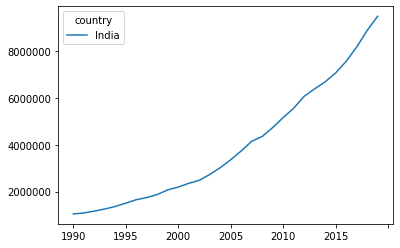

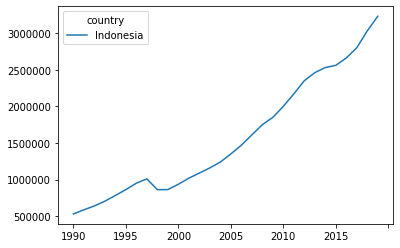

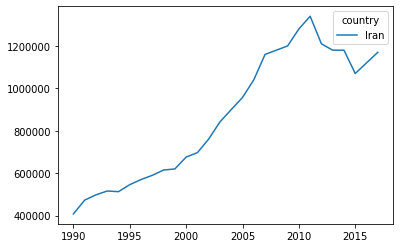

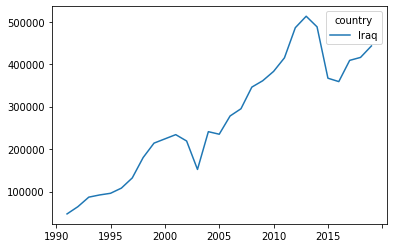

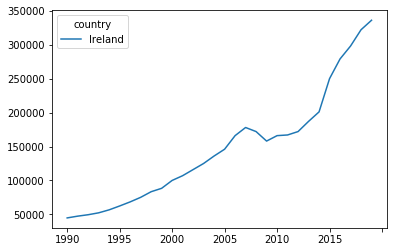

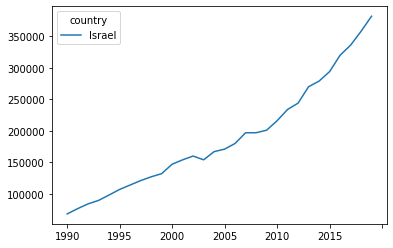

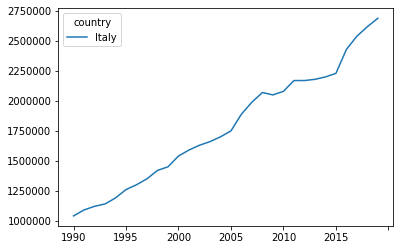

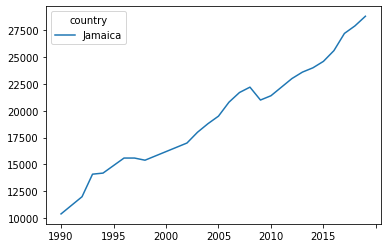

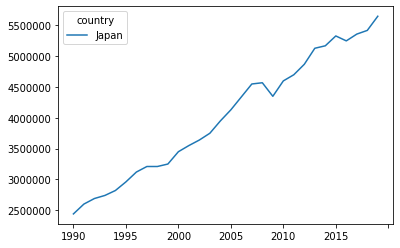

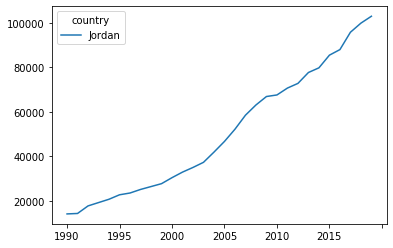

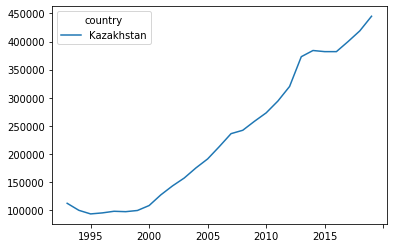

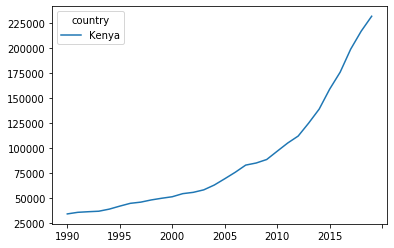

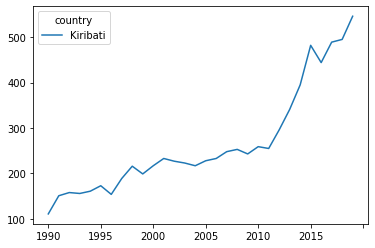

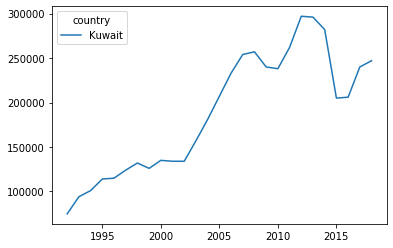

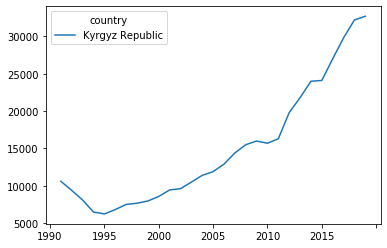

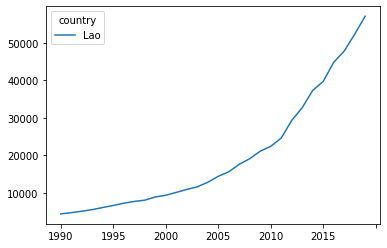

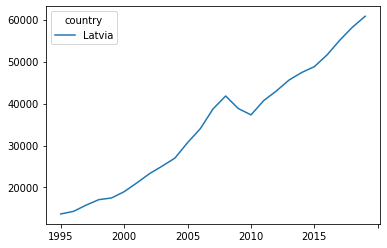

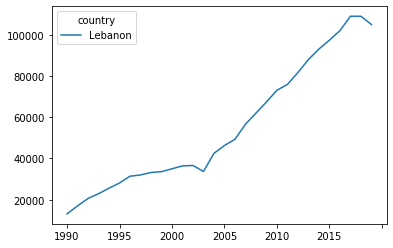

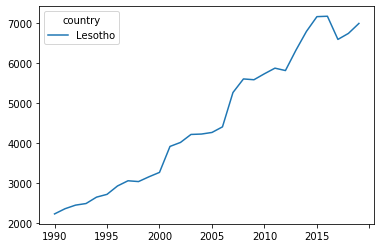

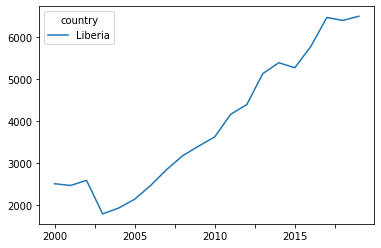

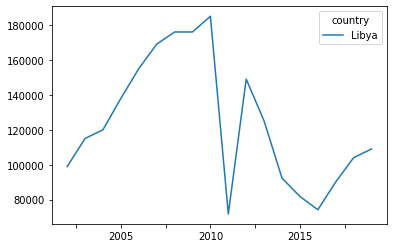

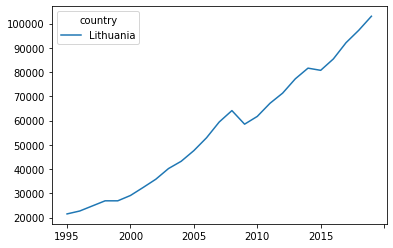

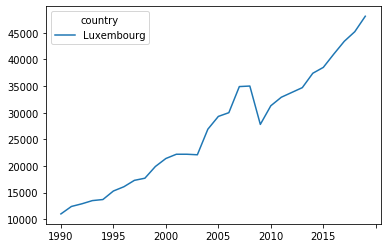

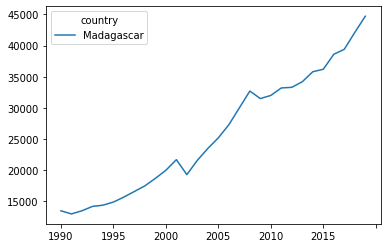

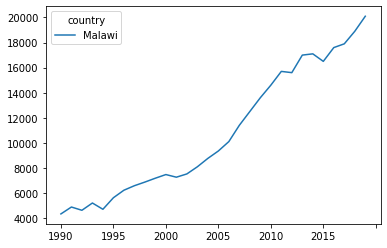

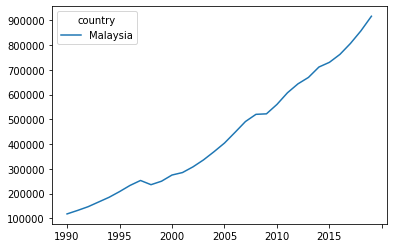

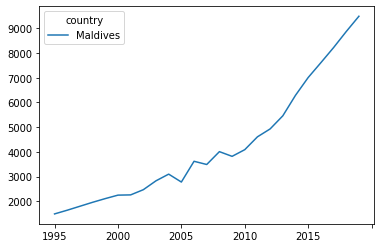

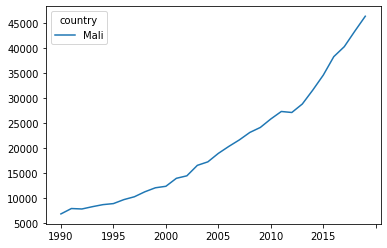

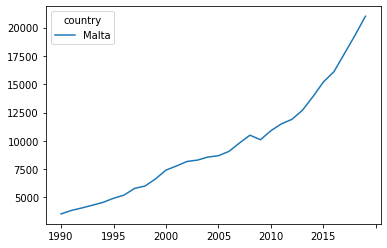

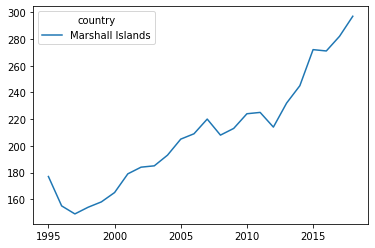

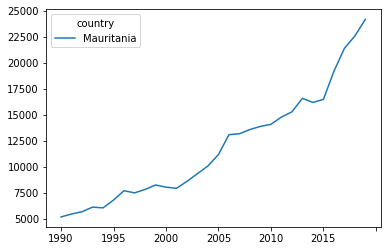

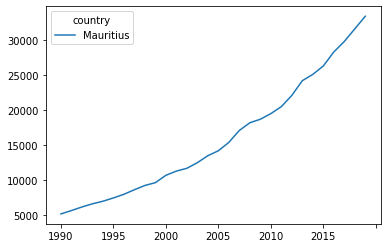

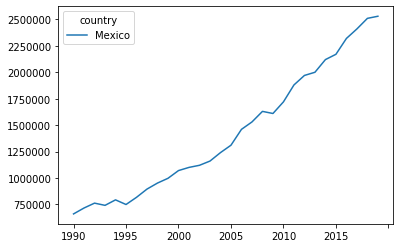

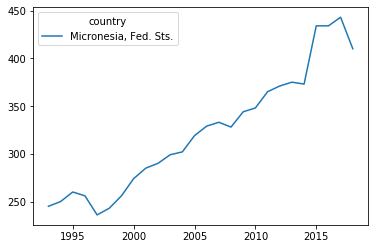

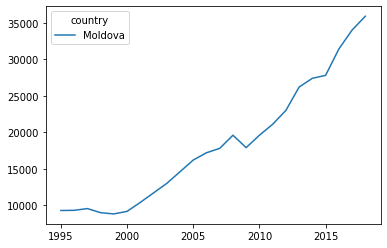

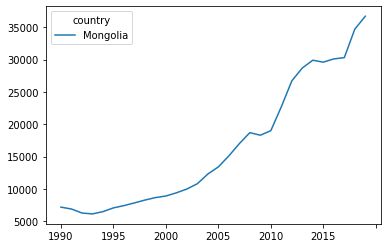

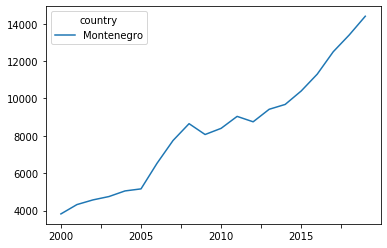

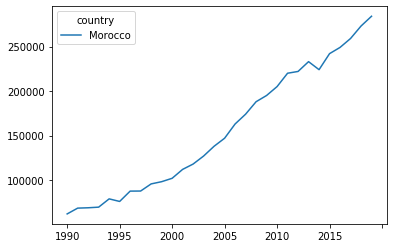

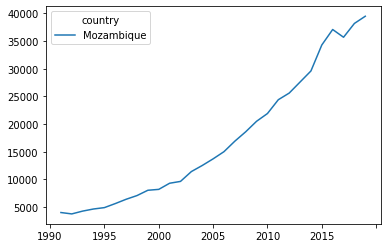

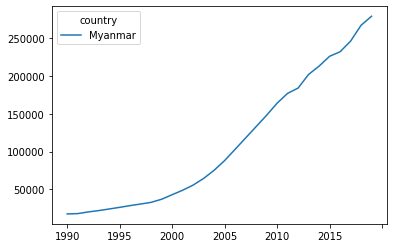

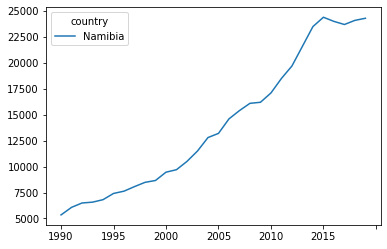

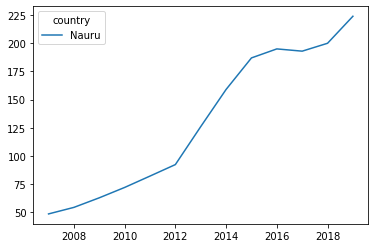

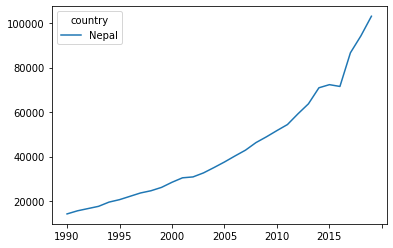

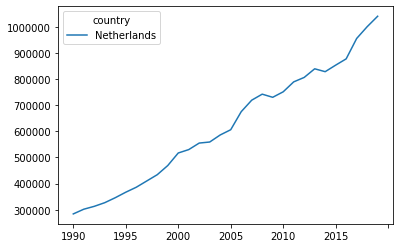

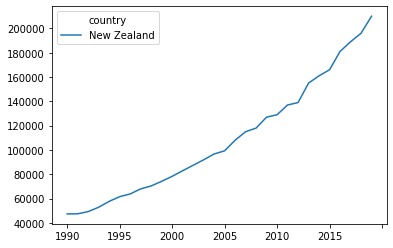

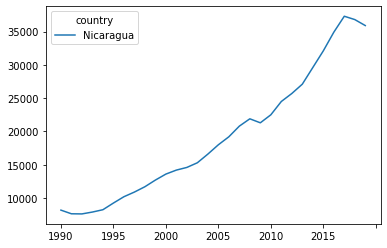

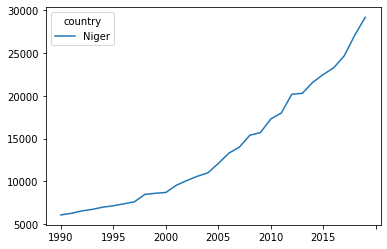

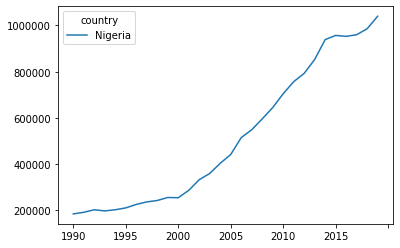

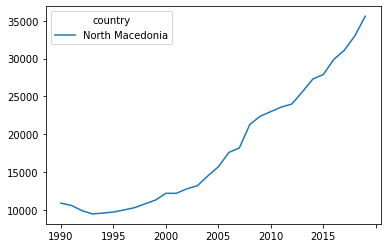

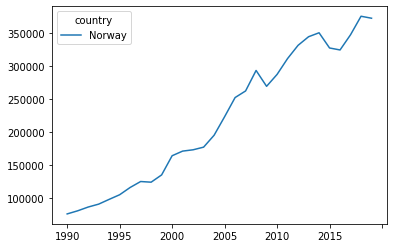

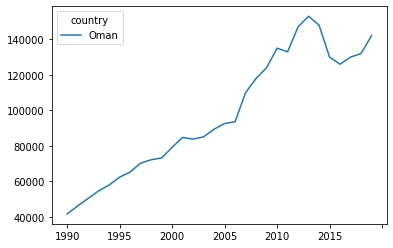

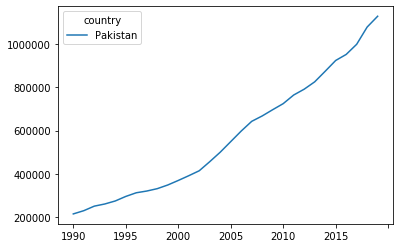

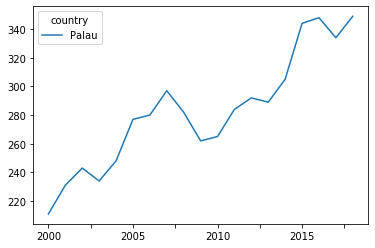

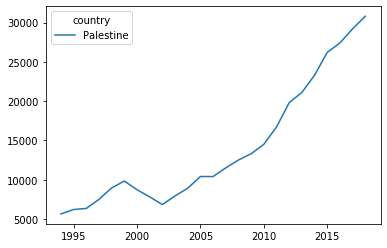

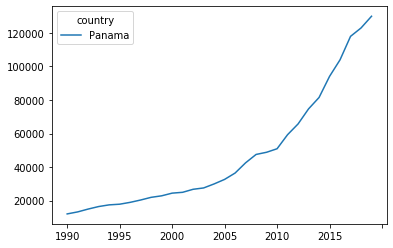

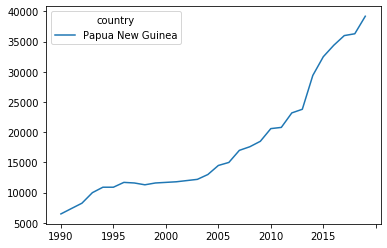

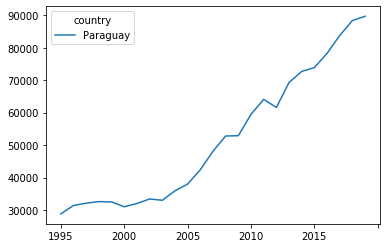

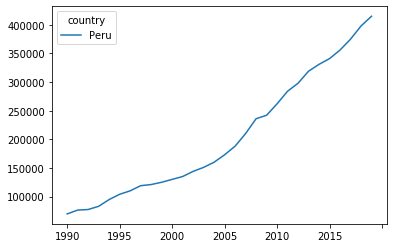

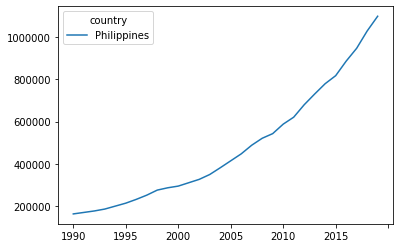

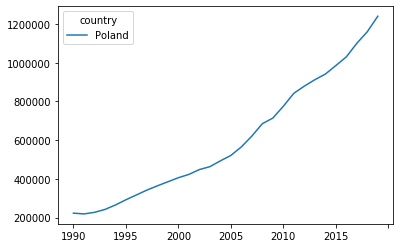

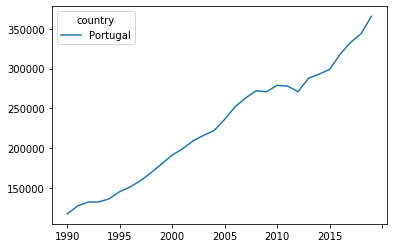

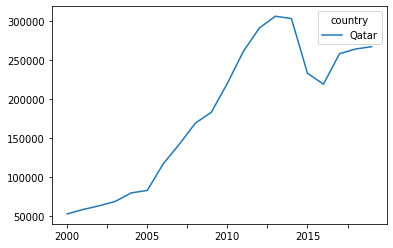

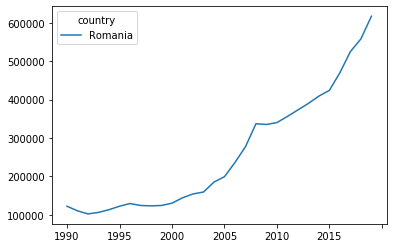

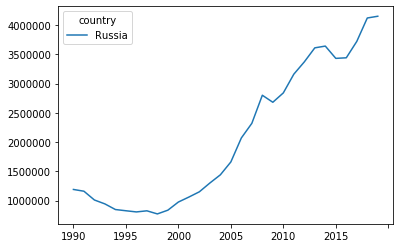

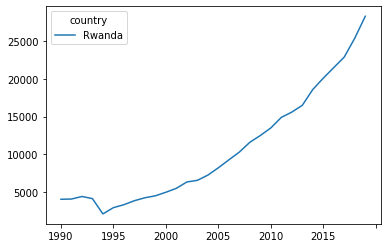

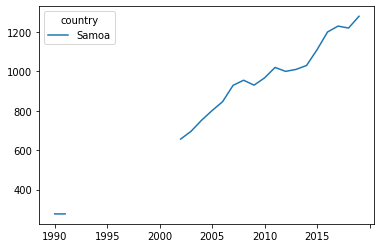

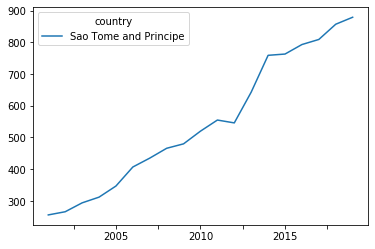

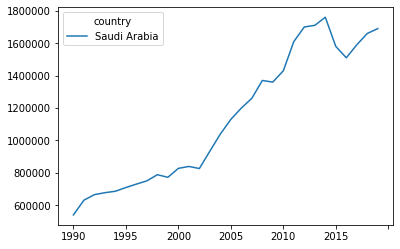

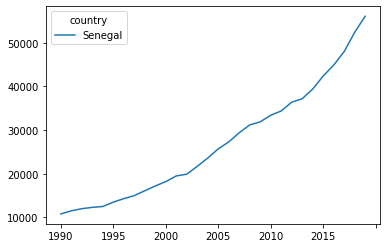

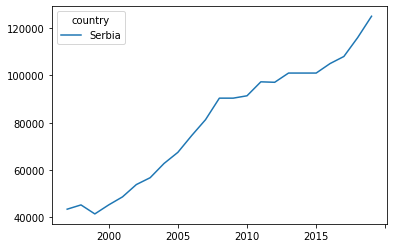

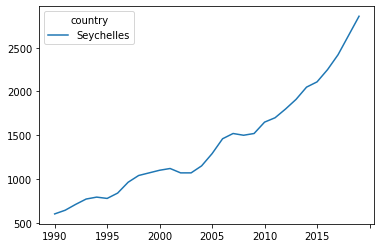

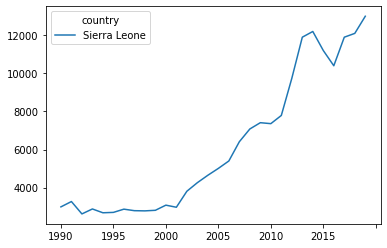

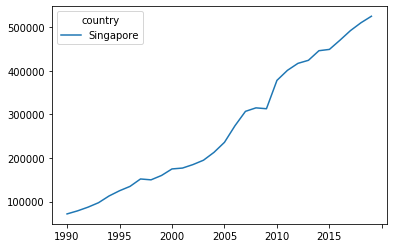

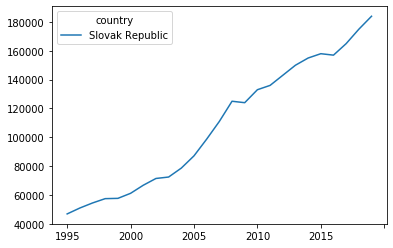

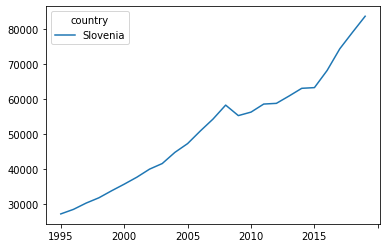

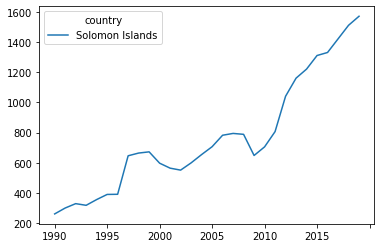

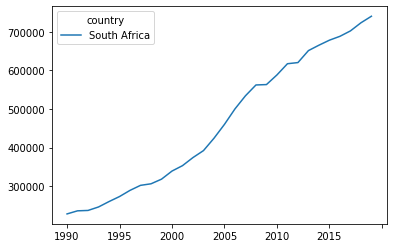

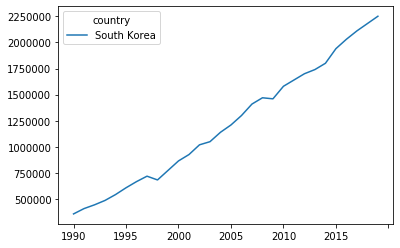

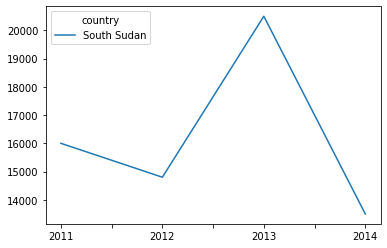

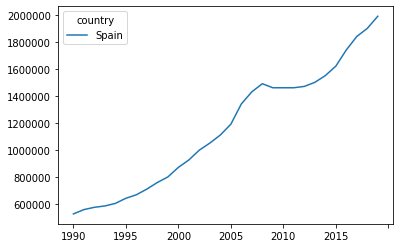

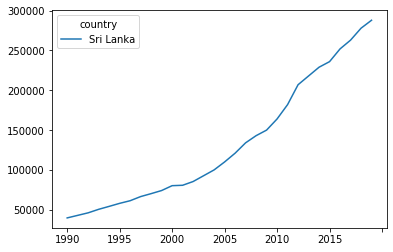

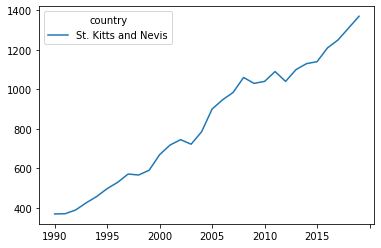

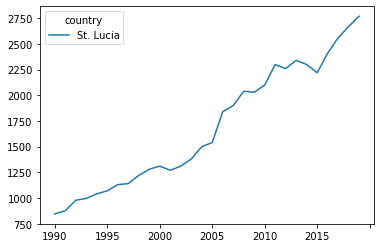

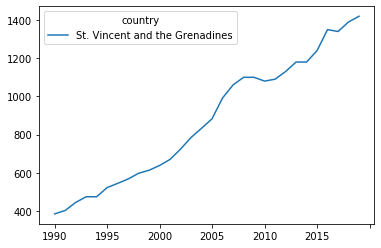

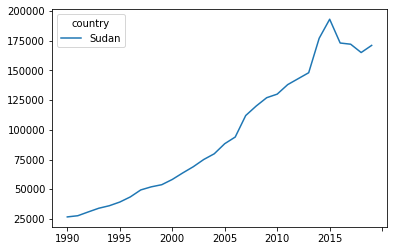

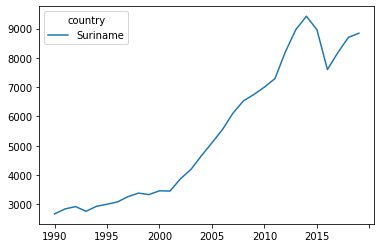

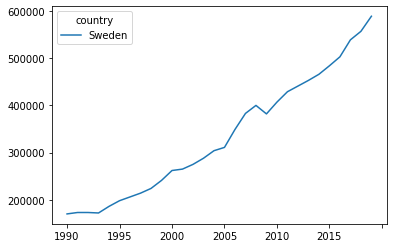

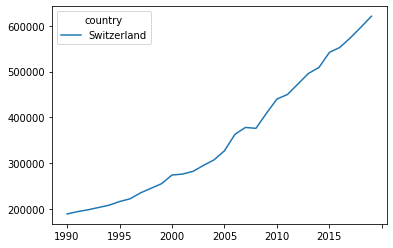

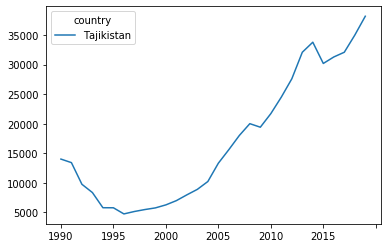

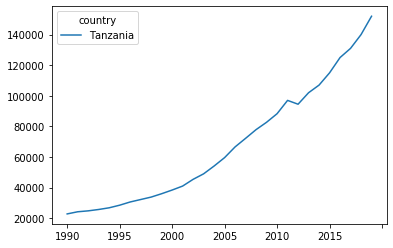

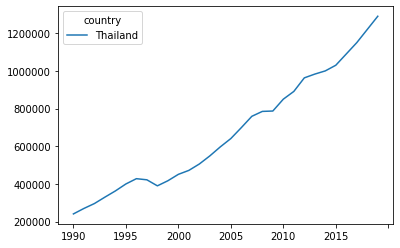

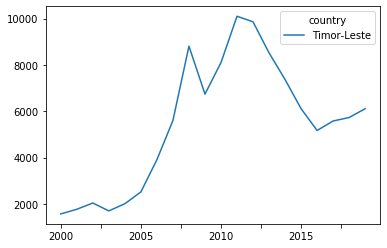

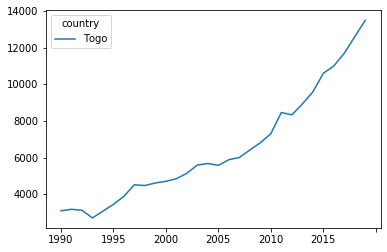

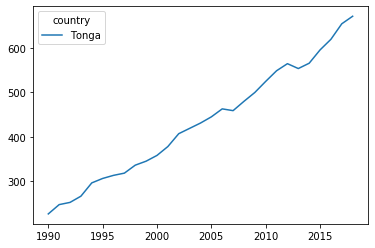

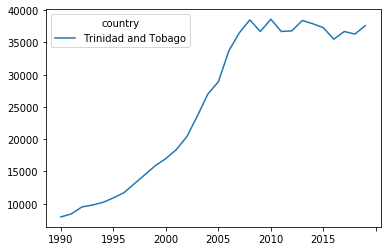

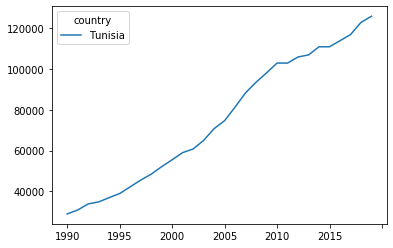

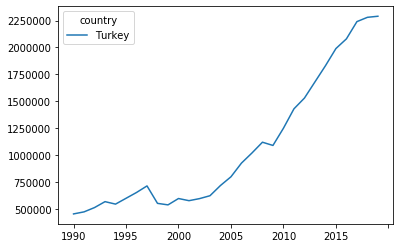

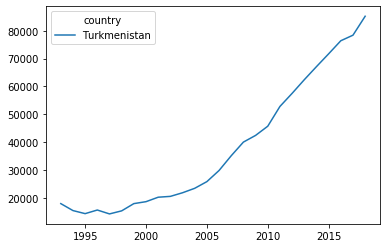

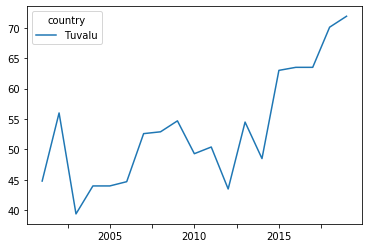

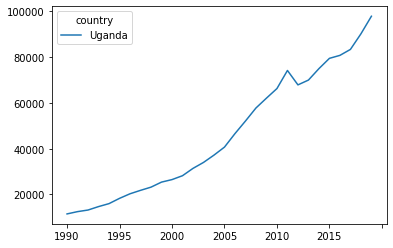

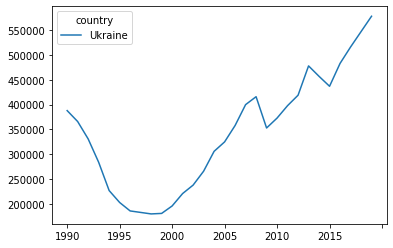

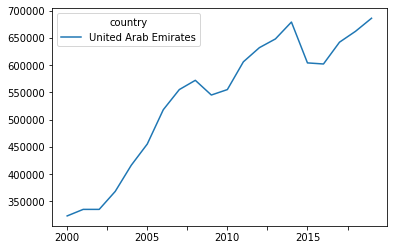

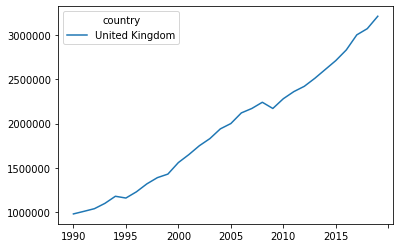

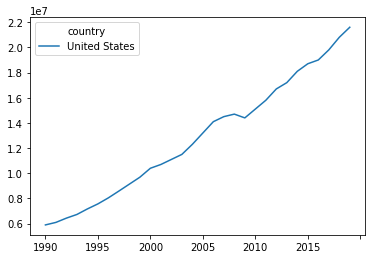

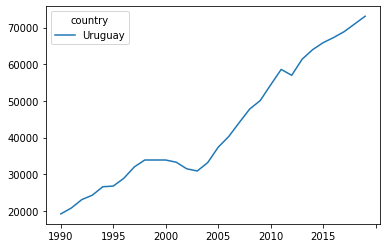

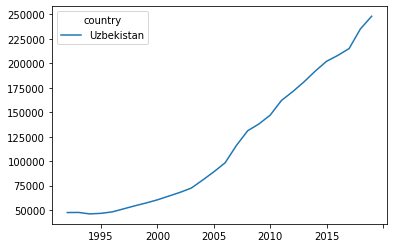

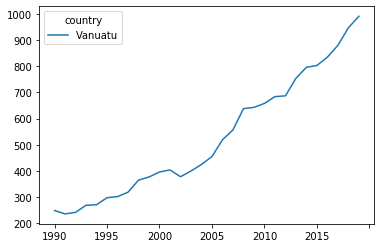

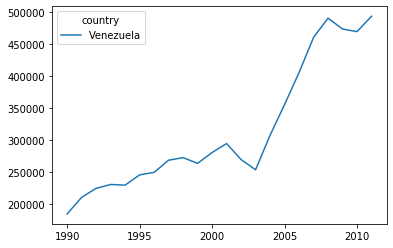

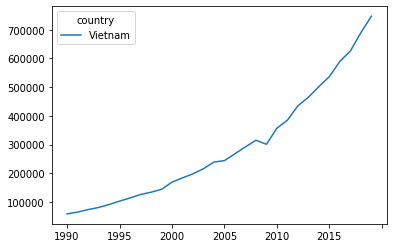

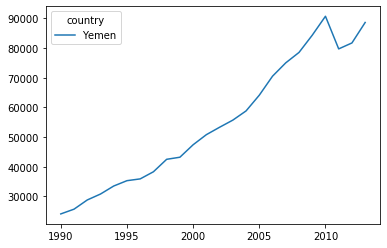

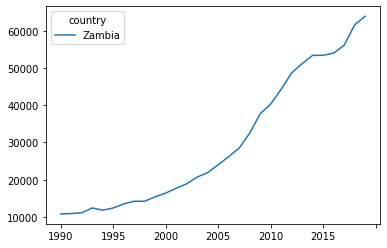

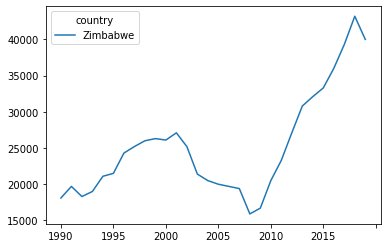

In [18]:
for i in range(income.shape[0]):
    income.iloc[[i], : ].T;
    df= income.iloc[[i], : ].T;
    df=pd.DataFrame(df);
    df.plot();
 

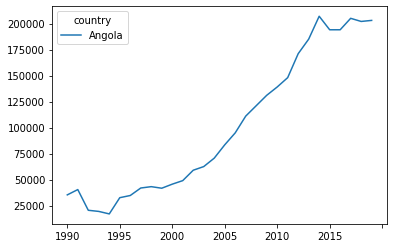

In [19]:
income.iloc[[3], : ].T;
df= income.iloc[[3], : ].T;
df=pd.DataFrame(df);
df.plot();

In [20]:
#cols=list(income.columns.values)
#cols 

C:\Users\hp\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


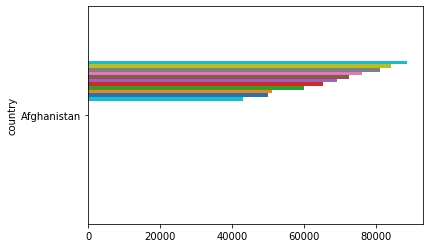

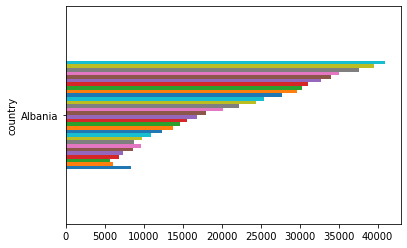

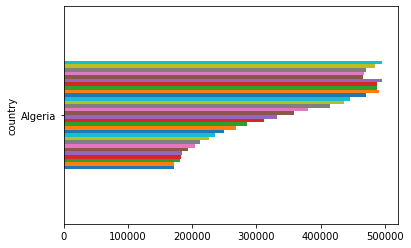

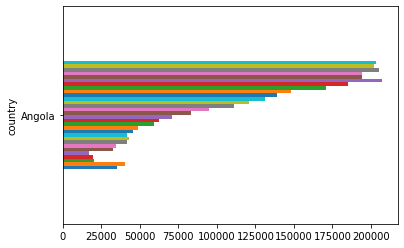

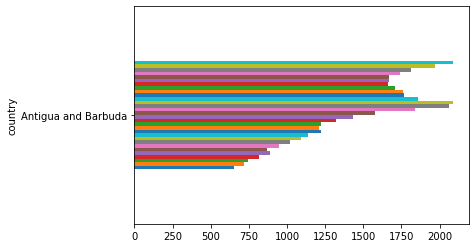

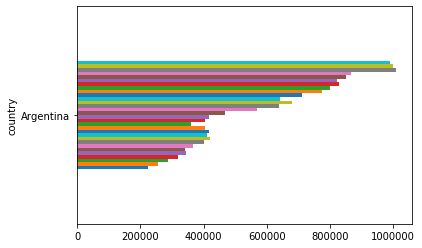

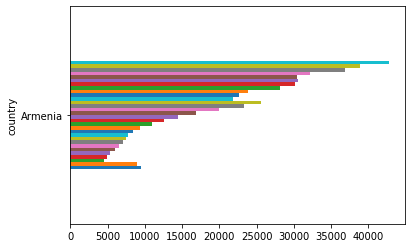

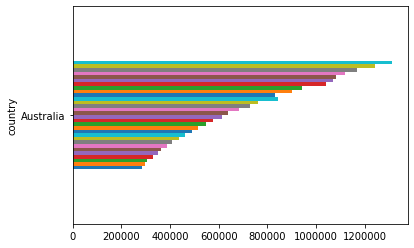

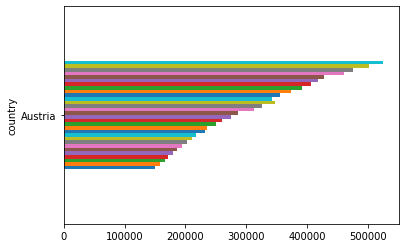

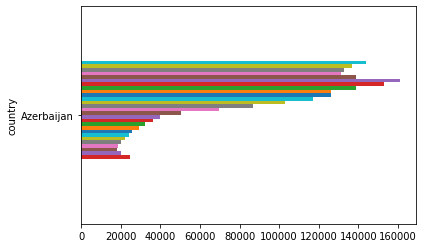

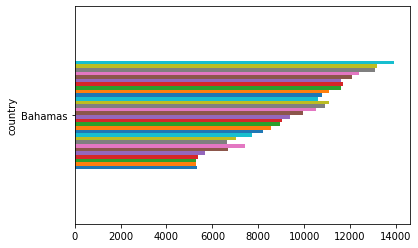

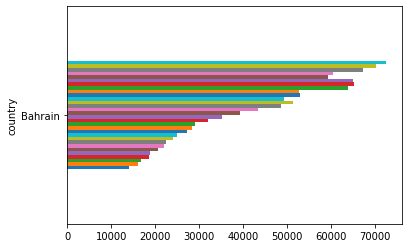

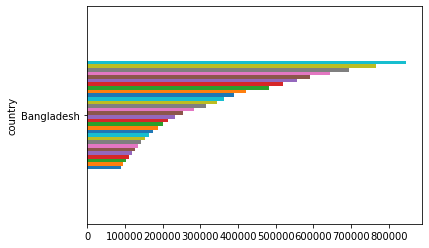

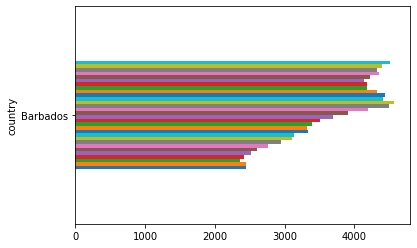

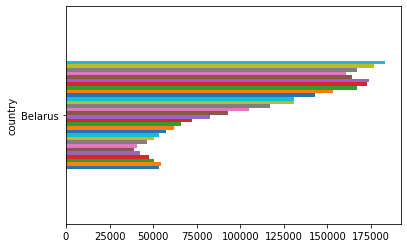

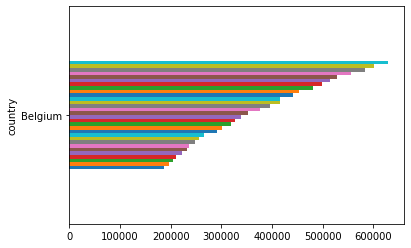

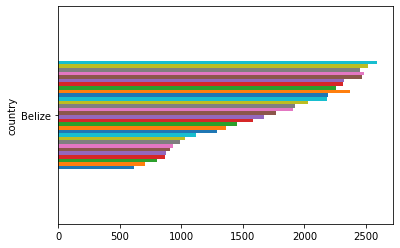

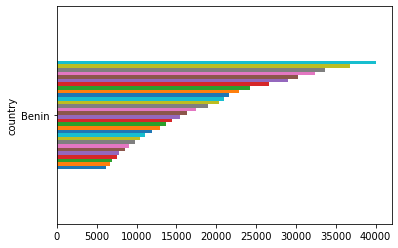

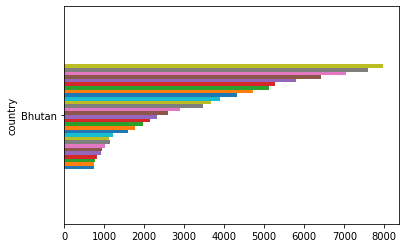

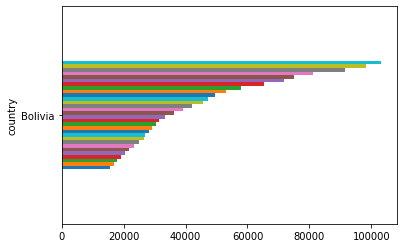

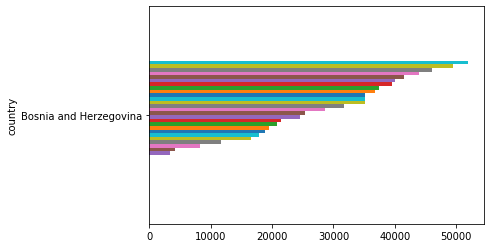

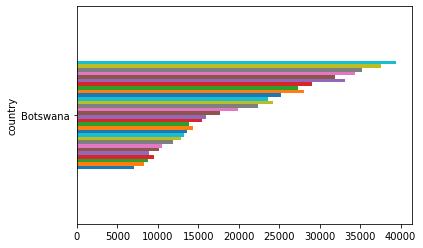

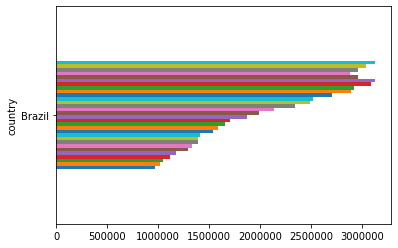

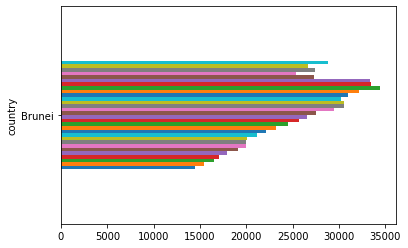

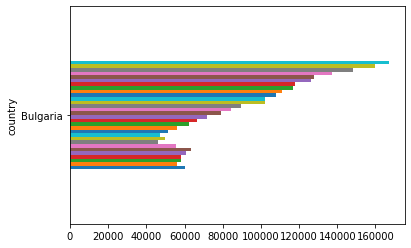

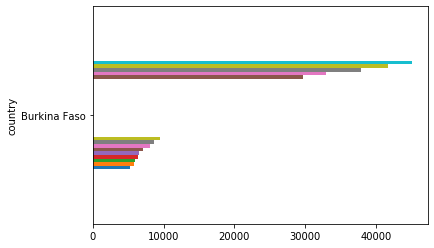

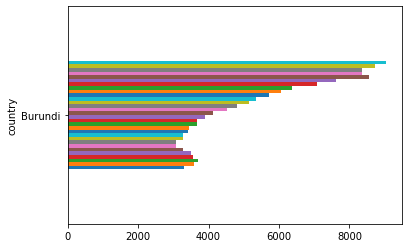

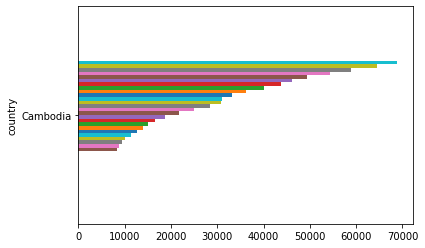

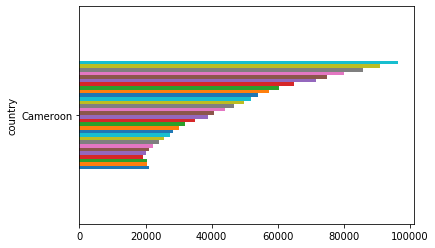

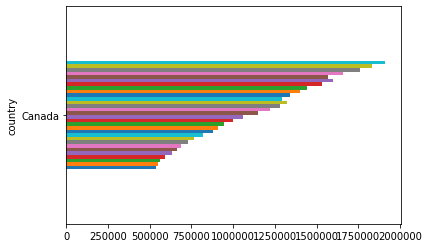

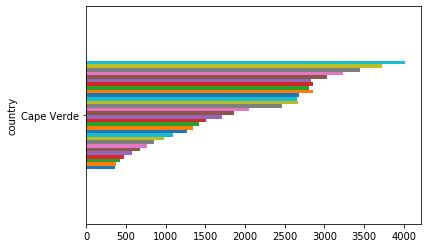

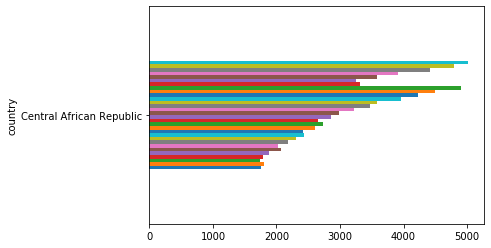

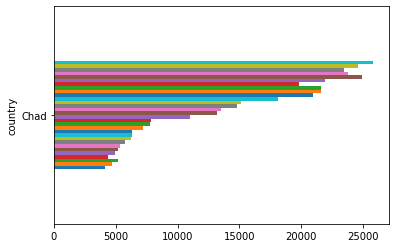

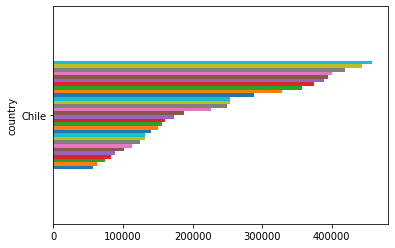

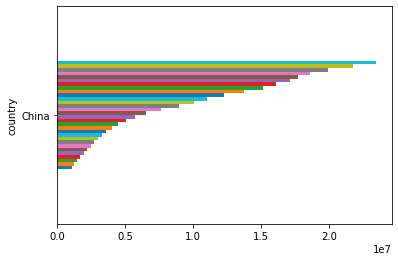

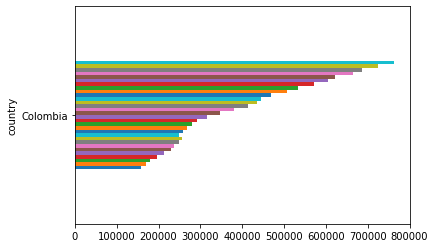

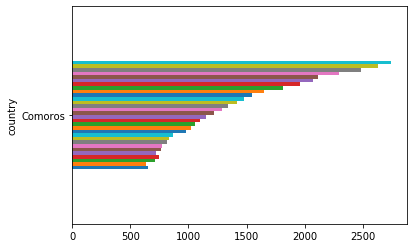

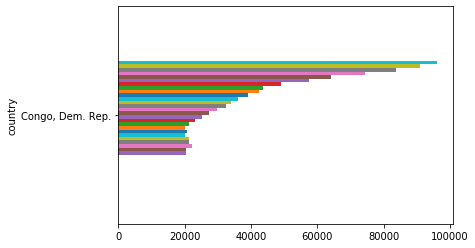

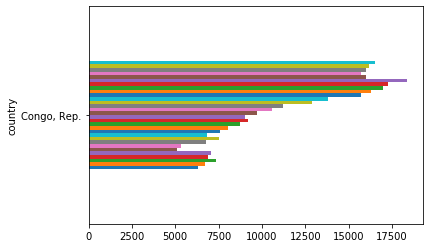

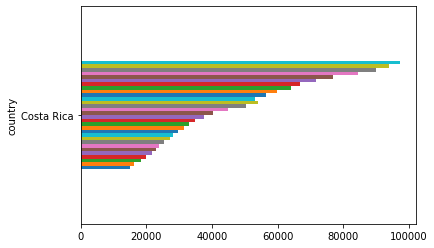

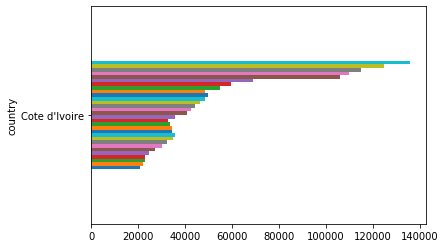

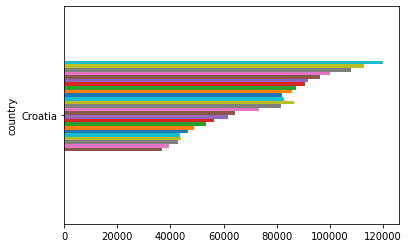

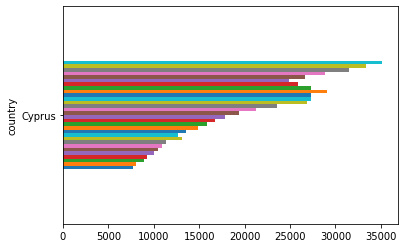

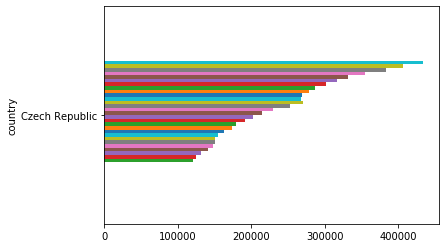

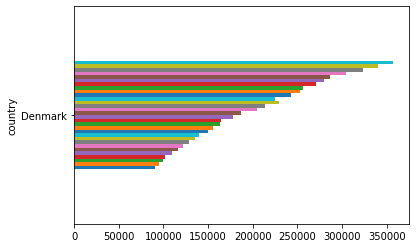

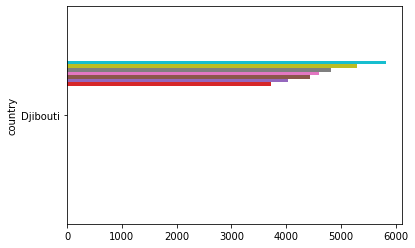

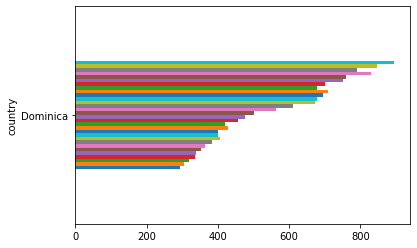

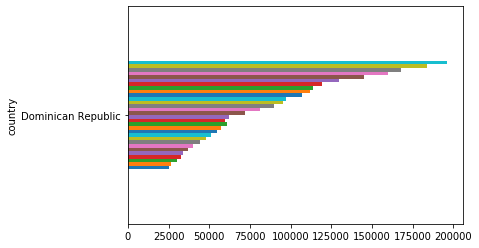

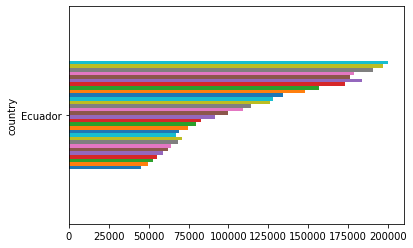

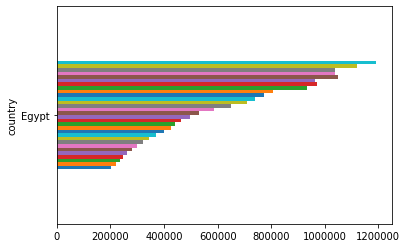

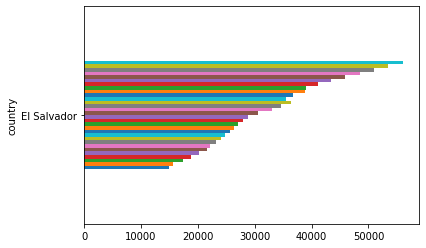

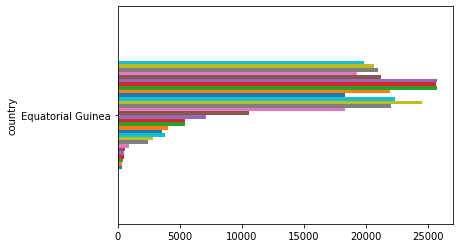

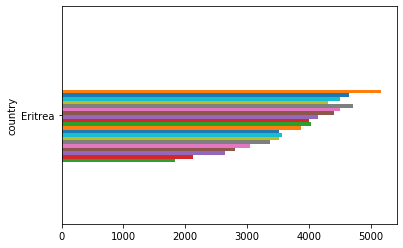

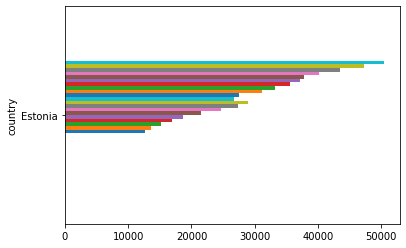

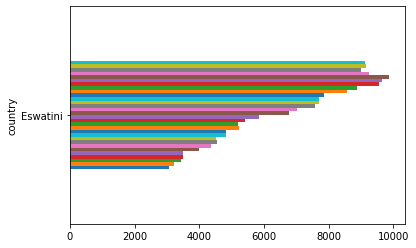

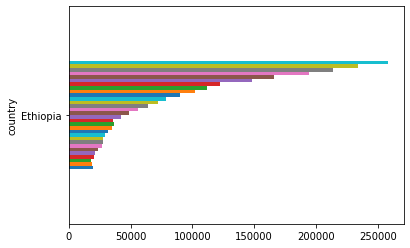

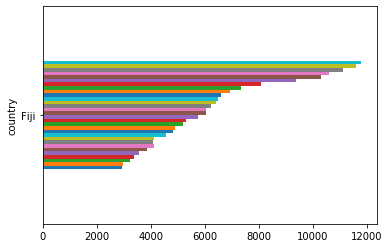

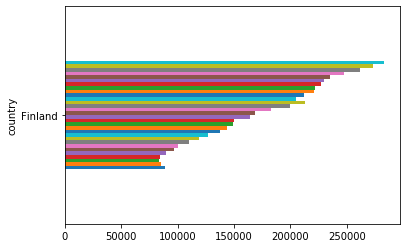

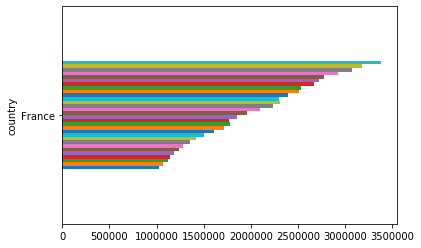

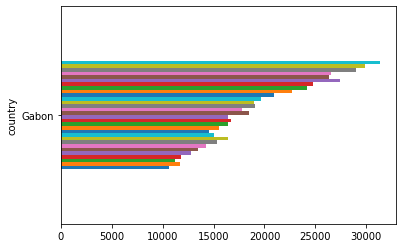

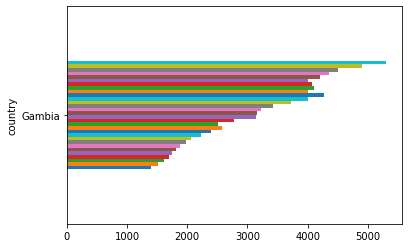

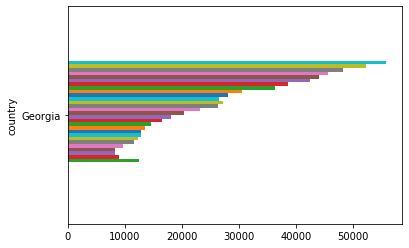

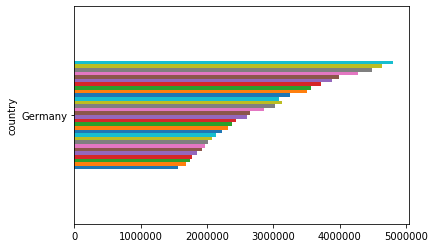

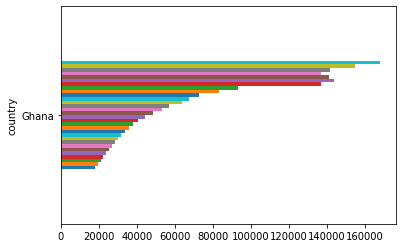

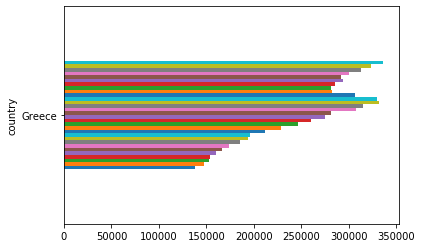

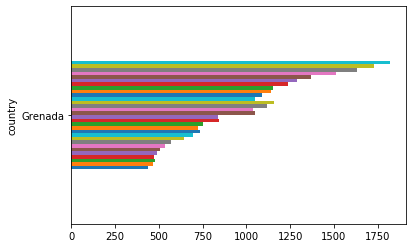

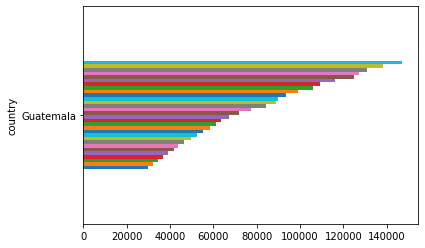

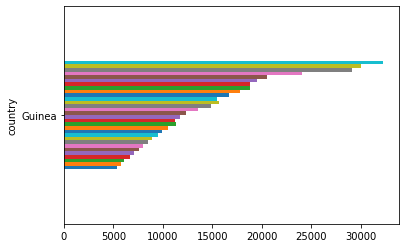

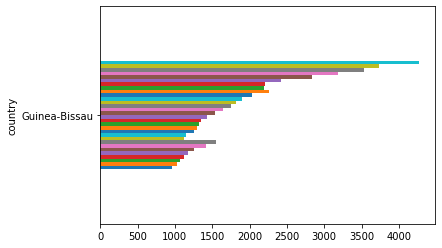

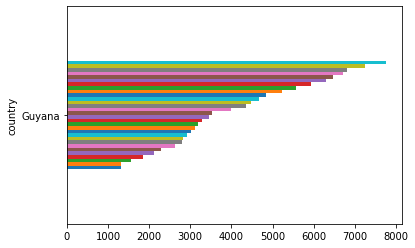

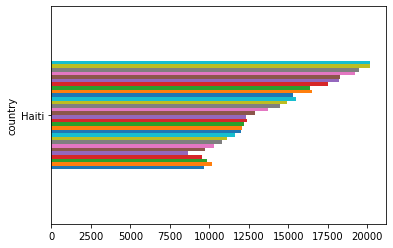

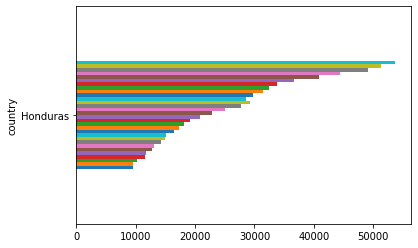

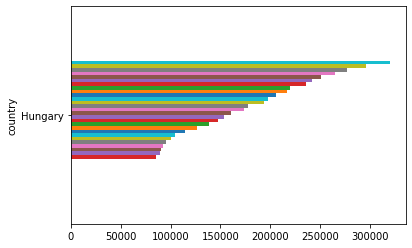

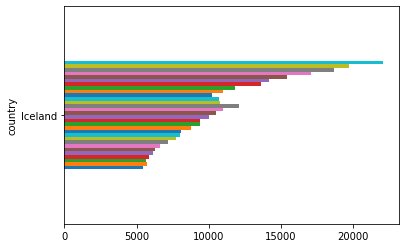

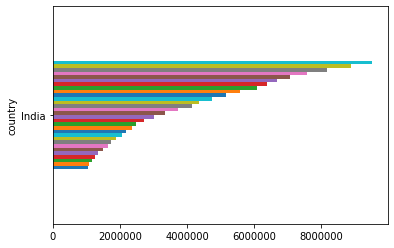

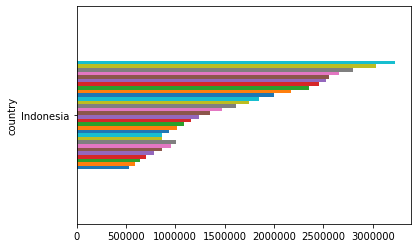

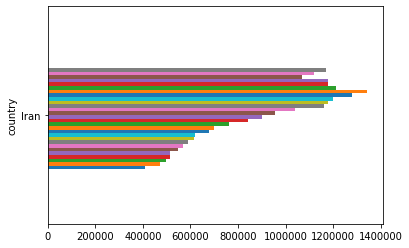

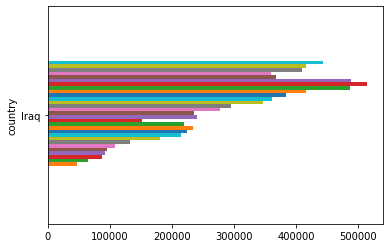

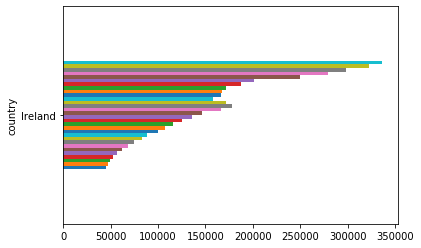

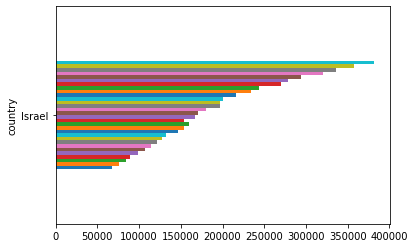

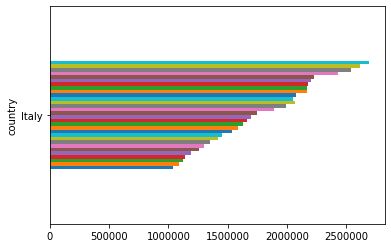

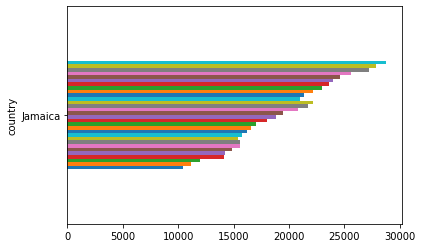

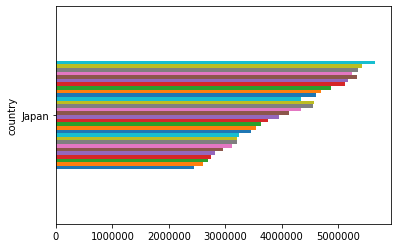

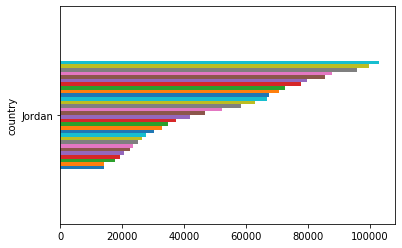

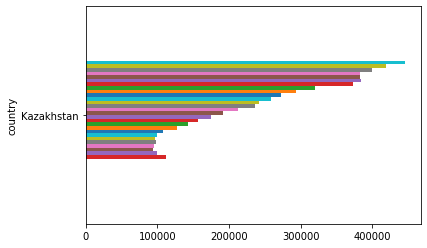

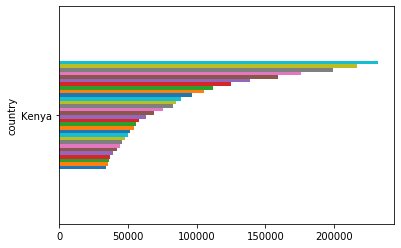

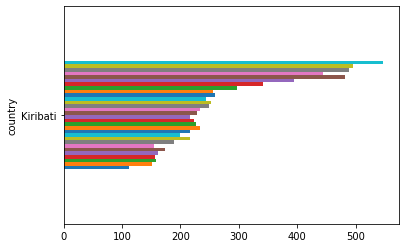

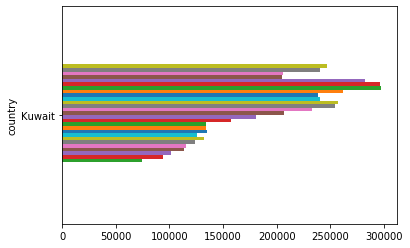

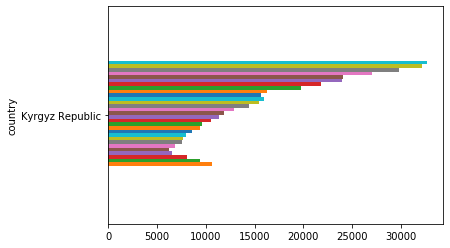

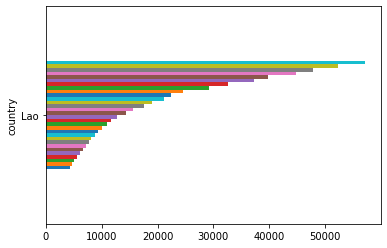

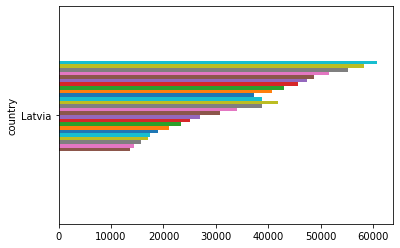

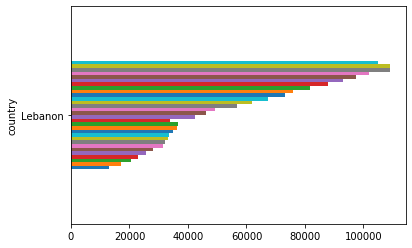

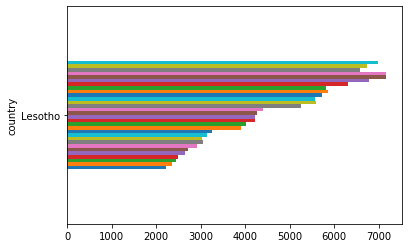

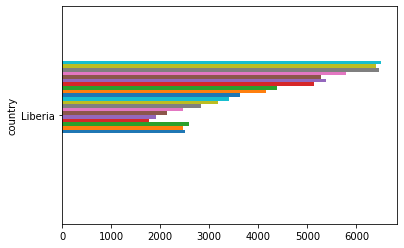

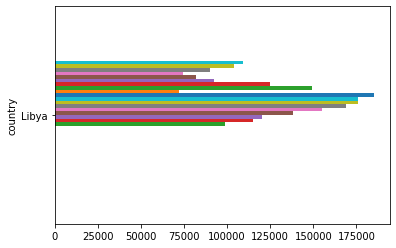

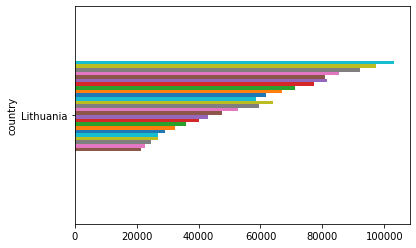

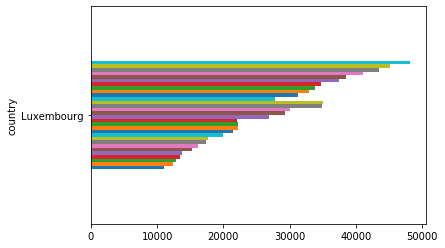

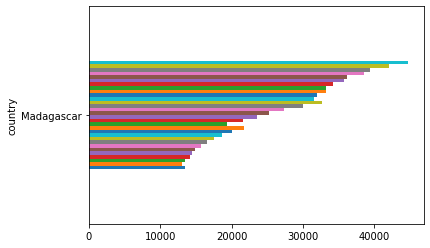

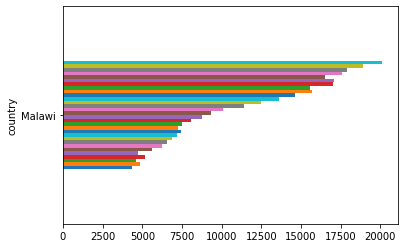

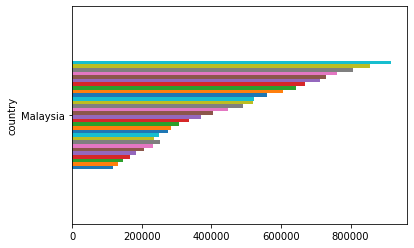

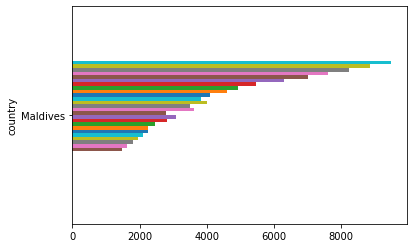

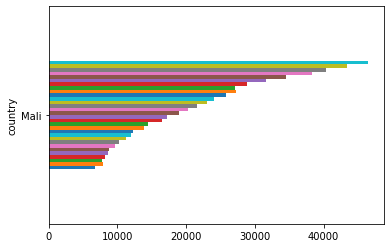

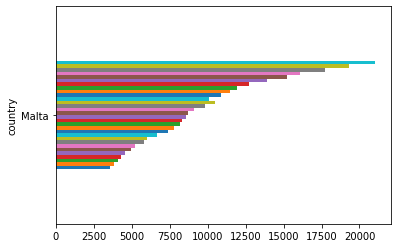

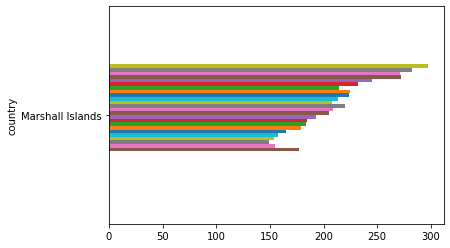

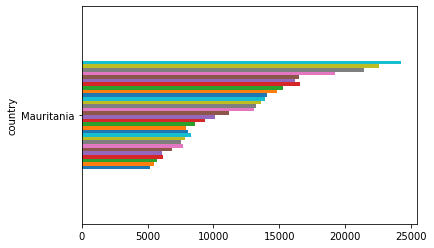

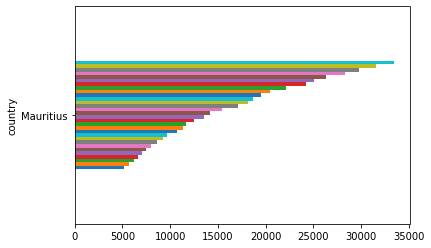

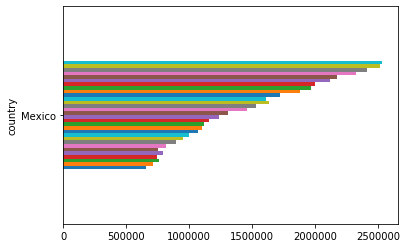

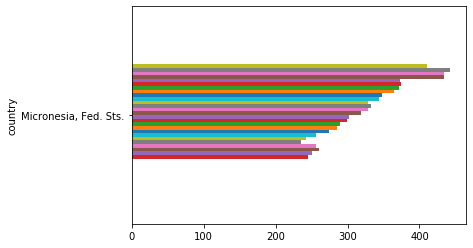

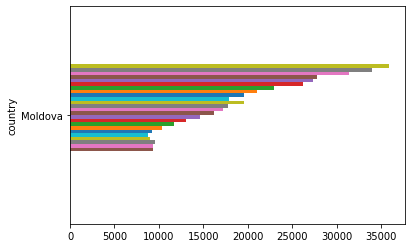

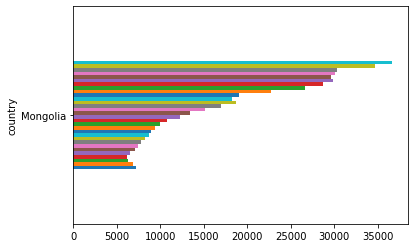

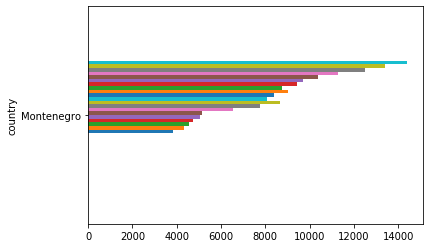

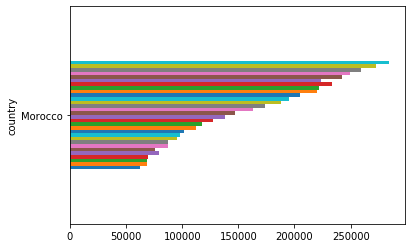

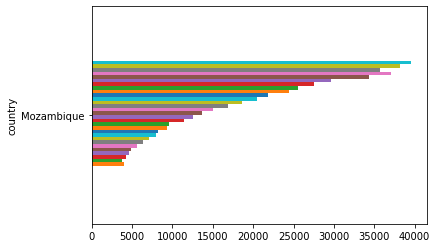

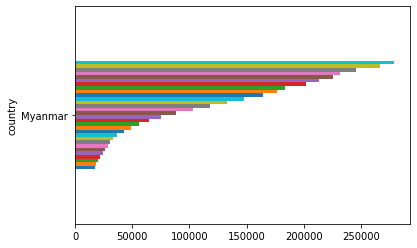

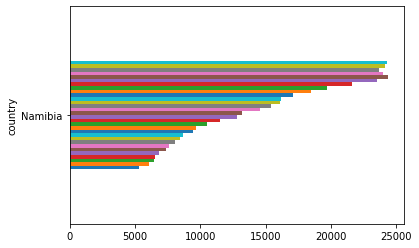

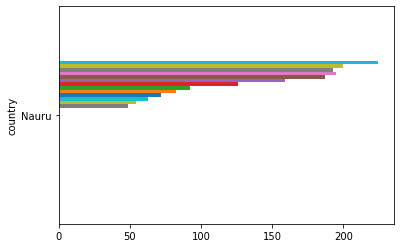

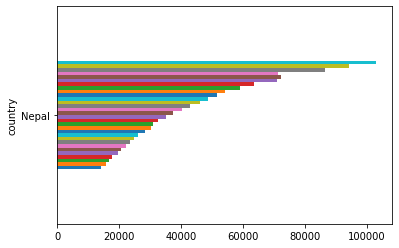

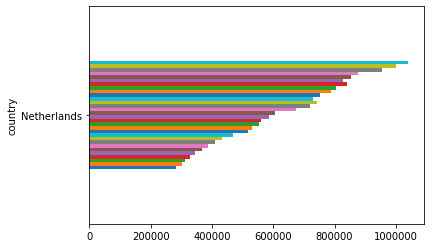

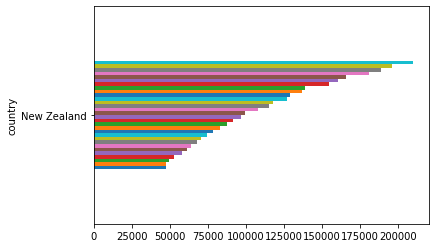

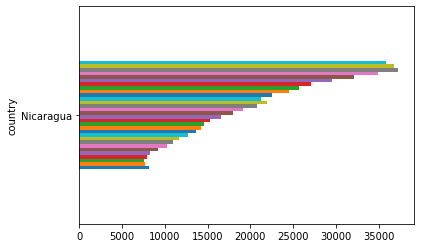

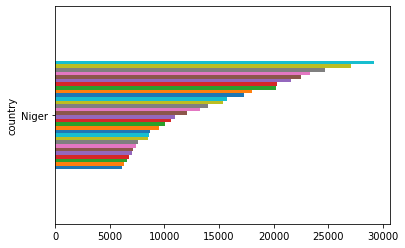

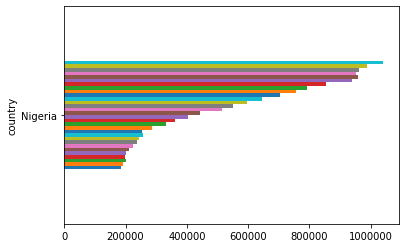

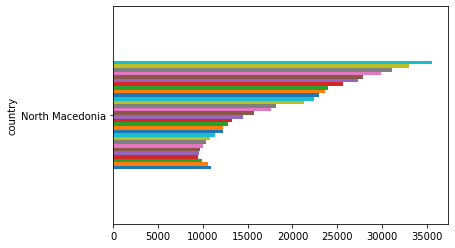

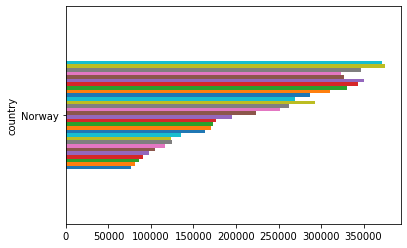

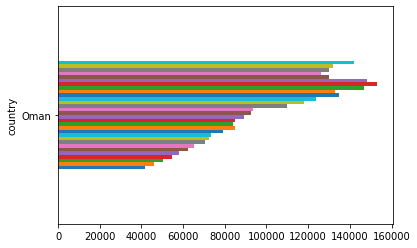

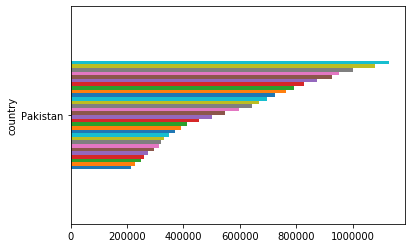

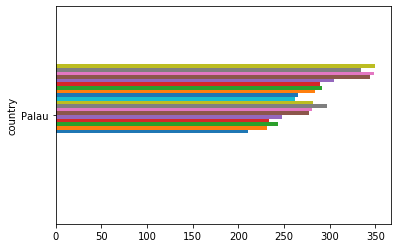

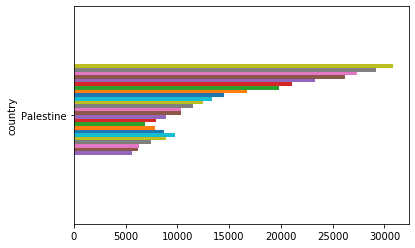

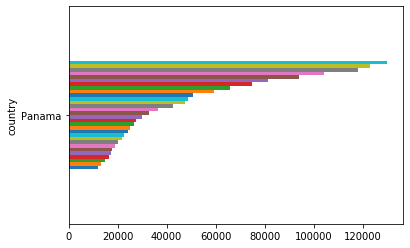

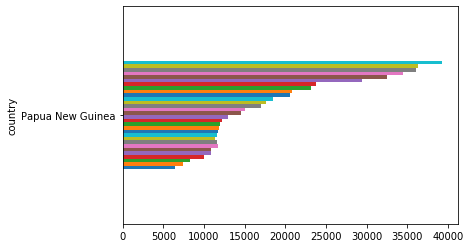

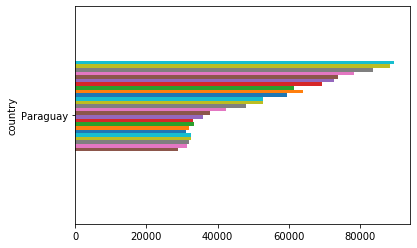

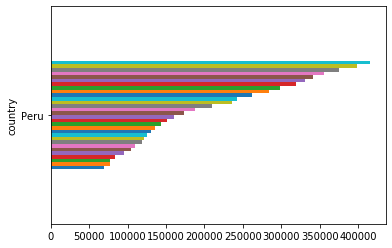

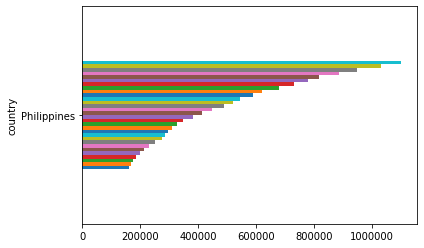

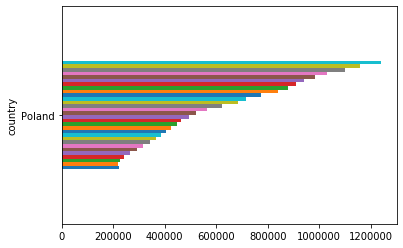

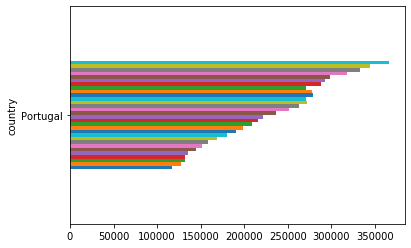

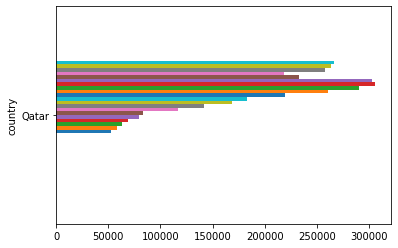

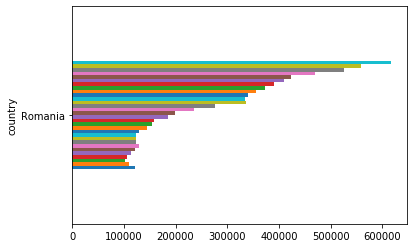

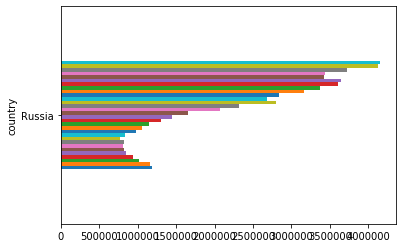

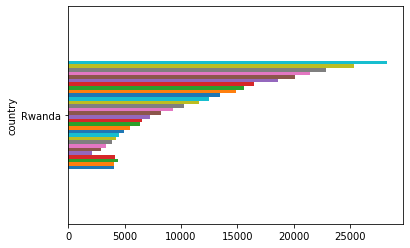

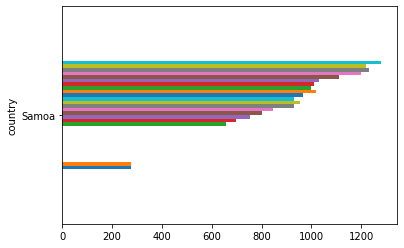

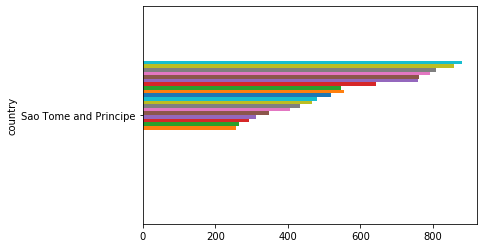

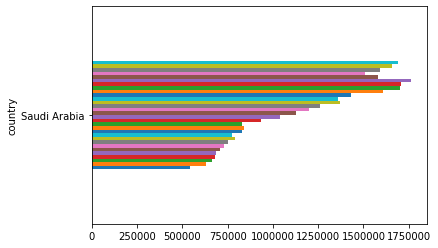

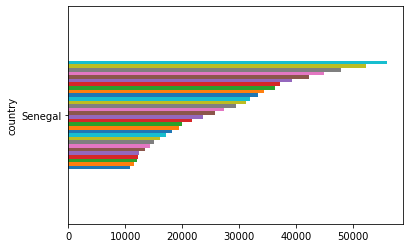

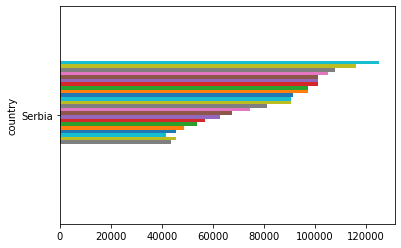

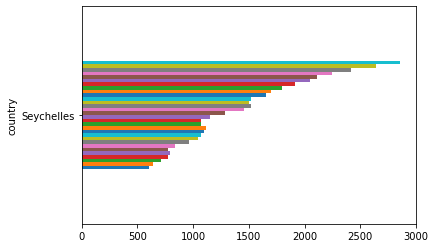

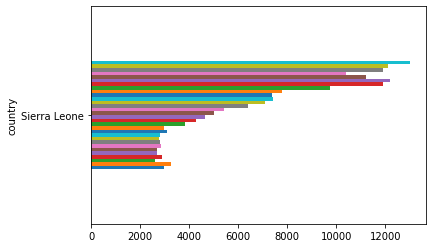

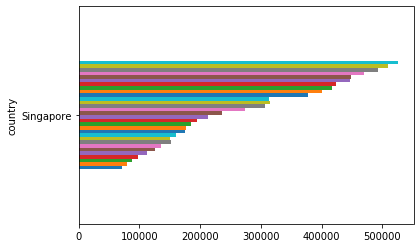

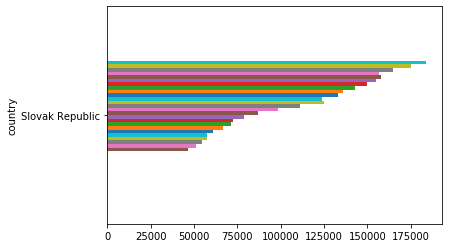

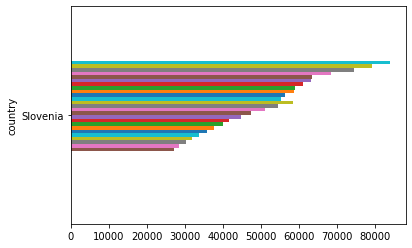

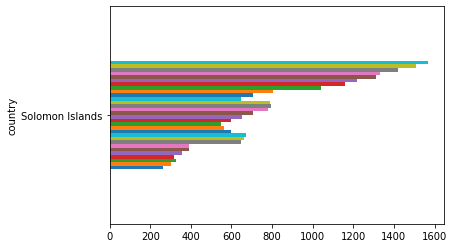

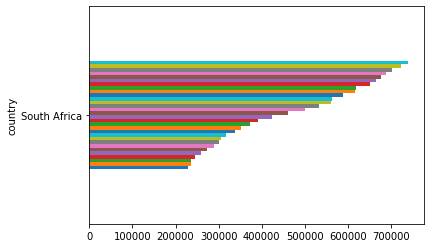

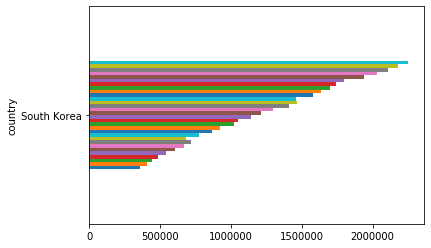

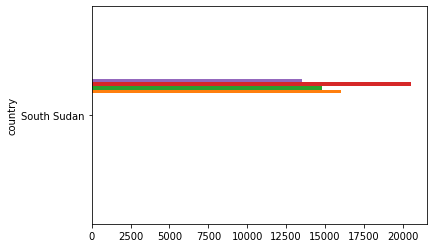

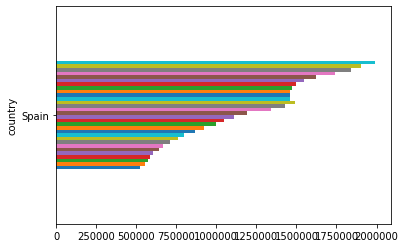

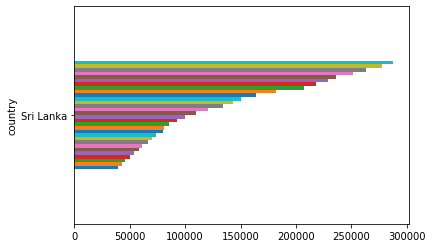

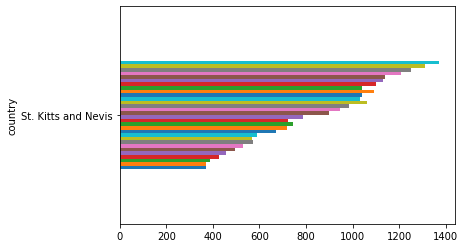

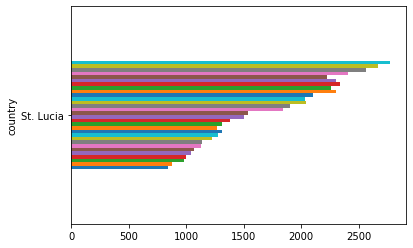

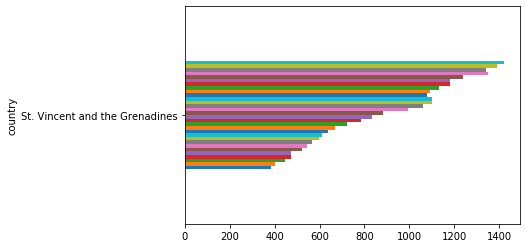

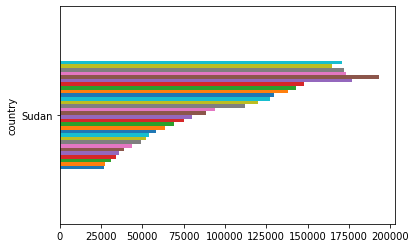

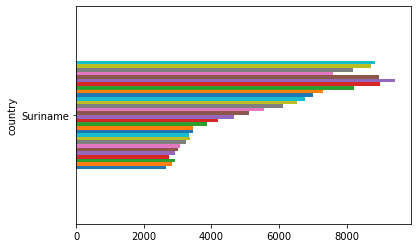

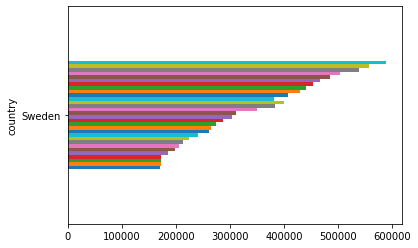

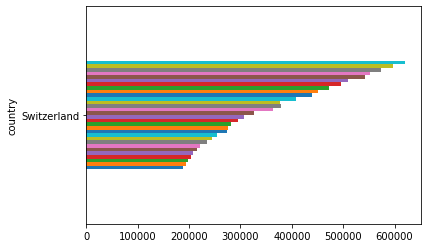

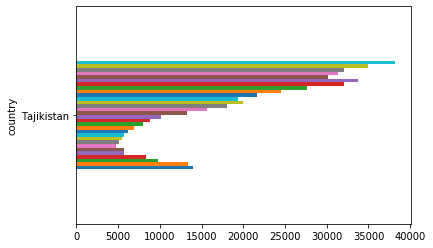

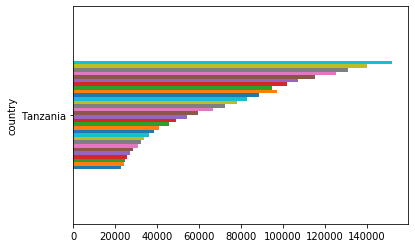

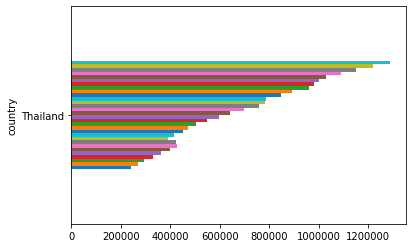

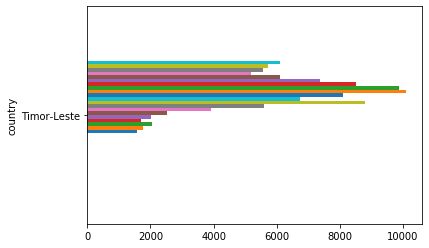

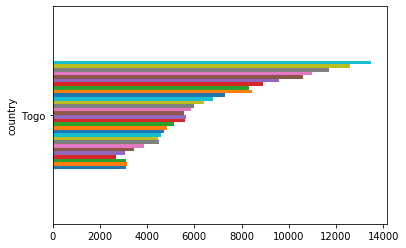

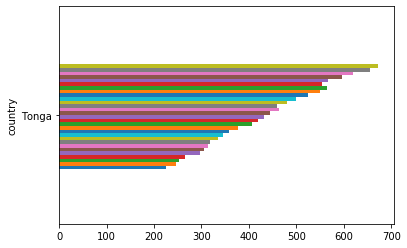

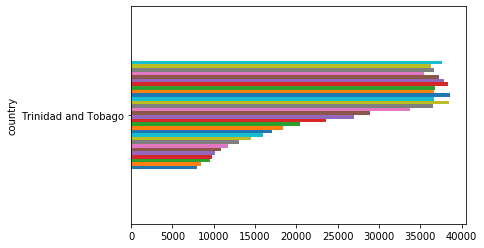

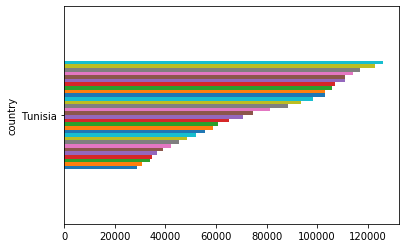

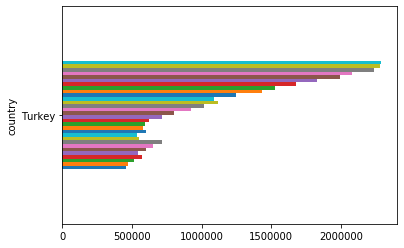

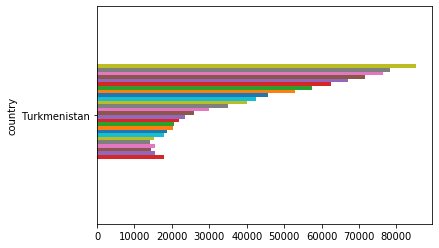

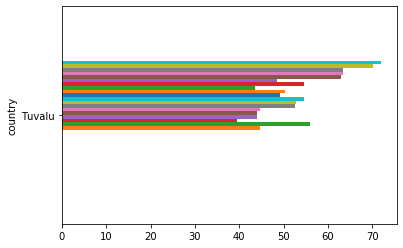

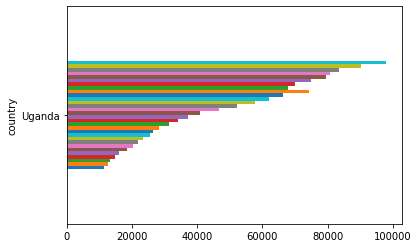

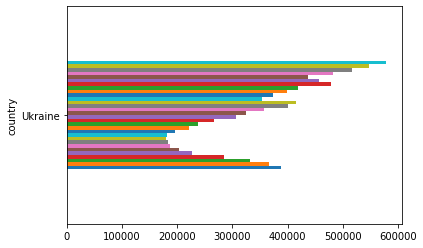

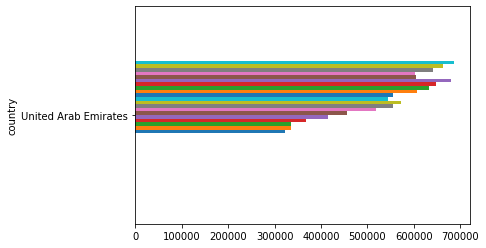

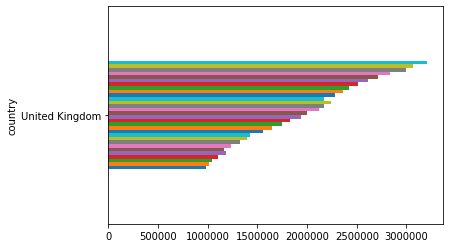

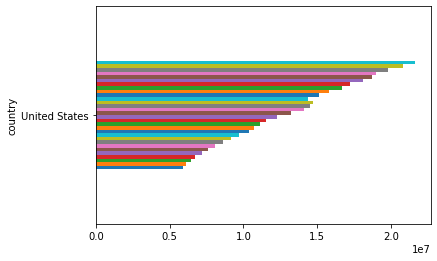

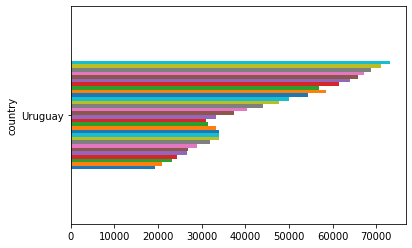

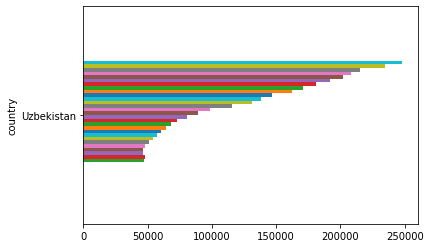

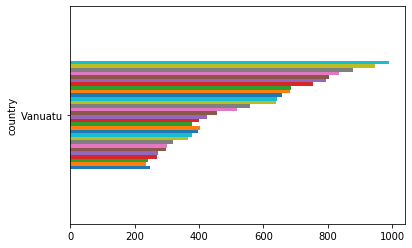

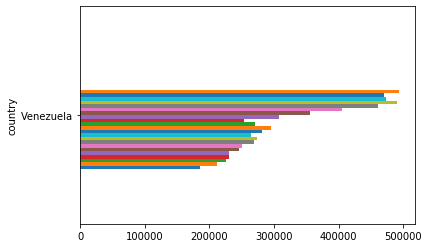

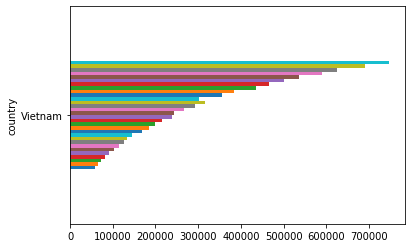

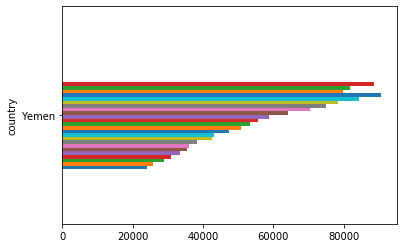

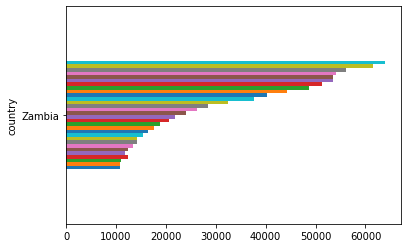

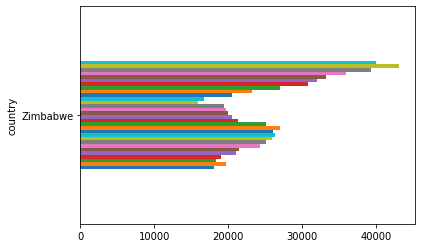

In [21]:
for i in range(income.shape[0]):
    subset=income.iloc[[i], : ]
    subset.plot(kind='barh',legend=None  );
 